Populating the interactive namespace from numpy and matplotlib


/Users/dylan/anaconda/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


<IPython.core.display.Javascript object>


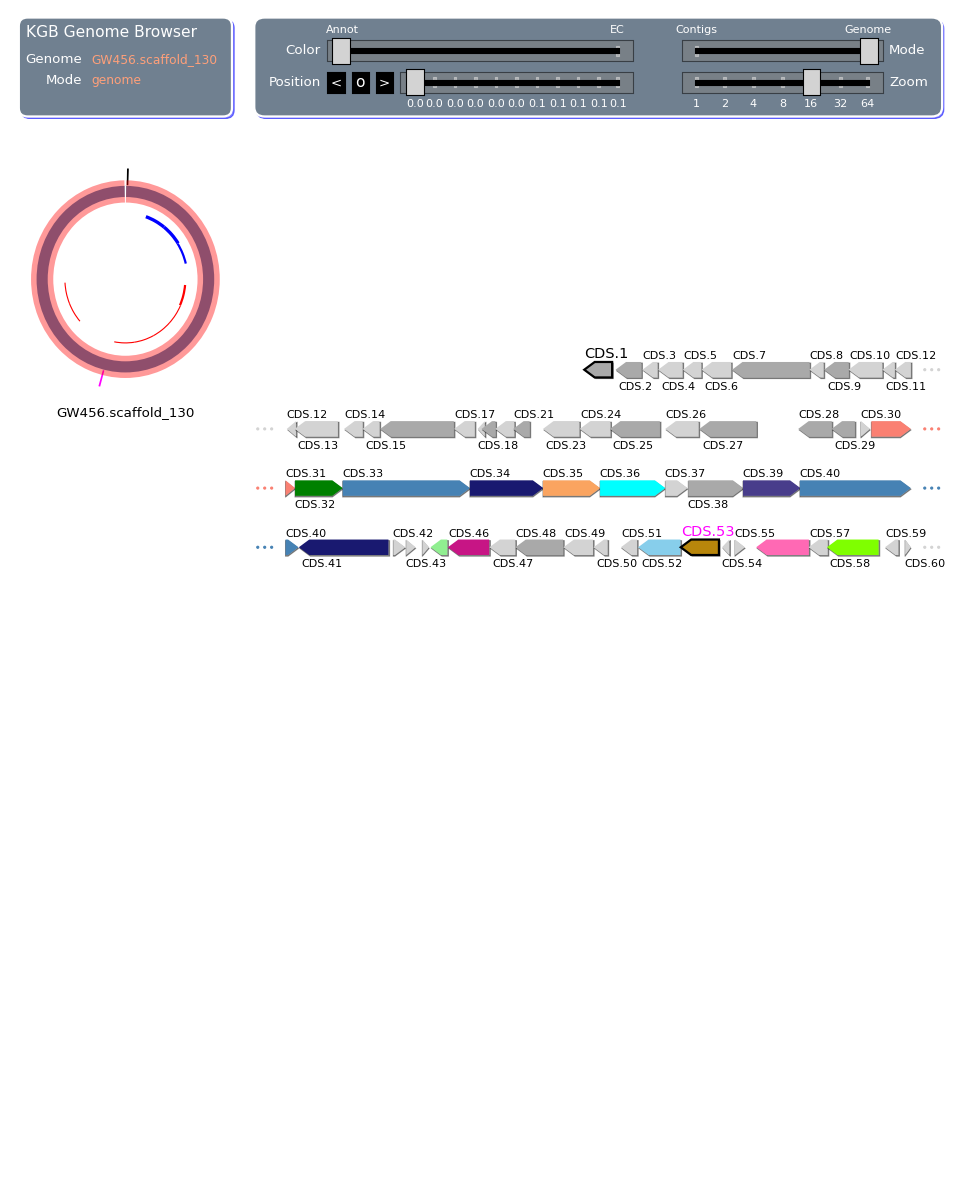

0 reading ./data/plasmid_contigs/GW456_old/scaffolds/scaffold_130.gbk


In [1]:
###############################################################################
# KGB user input vars  (Preferably implement as separate upstream cell)
###############################################################################        

#ref='ReferenceGenomeAnnotations/kb|g.3899'
#ref='ReferenceGenomeAnnotations/kb|g.2624'
#ref='ReferenceGenomeAnnotations/kb|g.2424'

GenomeSet_names = ['ReferenceGenomeAnnotations/kb|g.2424']
#GenomeSet_names = ["GW456", "GW460"]
ContigSet_names = []
OrthologSet_locusTags = []

#ContigSet_names = ["GW456.scaffold_130", "GW456.scaffold_437", "GW456.scaffold_206", "GW456.scaffold_1786", "GW460.scaffold_49", "GW460.scaffold_575"]
#OrthologSet_locusTags = ["GW456_SEED_annot.CDS.1", "GW456_SEED_annot.CDS.233", "GW456_SEED_annot.CDS.128", "GW456_SEED_annot.CDS.112", "GW460_SEED_annot.CDS.186", "GW460_SEED_annot.CDS.299"]

#ContigSet_names = ["Gsulf", "DvulH", "DdesulfG20", "EcoliK12", "Bsub", "DaudaxMP104C"]
#OrthologSet_locusTags = ["GSU2863", "DVU2928", "Dde_2997", "b3987", "BSU01070", "Daud0216"]
#ContigSet_names = ["Gsulf", "DvulH", "DdesulfG20", "EcoliK12", "Bsub", "DaudaxMP104C", "Gsulf", "DvulH", "DdesulfG20", "EcoliK12", "Bsub", "DaudaxMP104C"]
#OrthologSet_locusTags = ["GSU2863", "DVU2928", "Dde_2997", "b3987", "BSU01070", "Daud0216", "GSU2863", "DVU2928", "Dde_2997", "b3987", "BSU01070", "Daud0216"]
#ContigSet_names = ["Gsulf", "DvulH"]
#ContigSet_names = ["Gsulf", "DvulH"]
#OrthologSet_locusTags = ["GSU2863", "DVU2928"]

#Search_Terms = []
Search_Terms = ['pil or conj or mobil or partition or t-dna or vir or plasmid',
                'toxin'
                #'tra',
                #'rep'
               ]
#Search_Terms = ['dna-directed polymerase',
#                '16S',
#                'DNA and methyltransferase',
#                '1.10.3.-',
#                'polymerase or dna-directed',
#                'fucI',
#                'sulfate adenylyl transferase']


PrimaryAnchor_leafId = "GW456.scaffold_130"
PrimaryAnchor_locusTag = "GW456_SEED_annot.CDS.1"

genome_data_base_path = "./data/plasmid_contigs"
genome_data_extra_subpath = "_old"
#genome_data_extra_subpath = "_circular_2KbpMIN"
#domain_data_base_path = "./data/plasmid_contigs"
domain_data_base_path = None
domain_family_desc_base_path = "./data/domain_desc"

#tree_data_base_path = './data'
#tree_data_file = 'rpoB_tree-names.newick'
tree_data_base_path = None
tree_data_file = None
tree_data_format = 'newick'

genome_data_format = "Genbank"
domain_data_format = "KBase_domains"

###############################################################################
# KGB
###############################################################################
"""
## KGB Genome Browser (KGB)                                                  
##                                                                              
##  An IPython/Jupyter Notebook genome browser that enables comparative         
##  browsing and searching of genome contig assemblies, with additional         
##  support for                                                                 
##                                                                              
##  * domain structure visualization                                            
##  * gene homology                                                             
##  * phylogenetic trees                                                        
##
## source code available at http://github.com/dcchivian/KGB
##                                                                              
## Copyright 2015,2016 Dylan Chivian  
##
##  Initial Author: Dylan Chivian (DCChivian@lbl.gov)
##  $Revision: 0.1 $
##  $Date: 2015/01/01 00:00:00 $
##  $Author: dylan $
##
"""
###############################################################################
# INIT
###############################################################################

KBase_backend = True
#KBase_backend = False

# Extra Init for KBase
#
if KBase_backend:
    %pylab notebook
    #matplotlib.use('nbagg')
    import os
    import doekbase.data_api
    from doekbase.data_api.annotation.genome_annotation.api import GenomeAnnotationAPI
    from doekbase.data_api.sequence.assembly.api import AssemblyAPI
    #from doekbase.data_api.taxonomy.taxon.api import TaxonAPI
    #from doekbase.data_api.core import ObjectAPI
    
    # Standard setup for accessing Data API
    services = {"workspace_service_url": "https://ci.kbase.us/services/ws/",
                "shock_service_url": "https://ci.kbase.us/services/shock-api/"}
    token = os.environ["KB_AUTH_TOKEN"]
    
# Init for just non-KBase use
#
if not KBase_backend:
    %pylab notebook
    from Bio import SeqIO

# Init for both
#
#import numpy as np # comes with pylab
from __future__ import print_function
from __future__ import division
import sys  # for io and exit
from os import walk  # for dir reading
from os import path  # for file existence check
import json
import csv
#from math import pi  # get with pylab
#from math import sqrt  # get with pylab
from math import acos
from Bio import Phylo
#import re
#matplotlib.use('nbagg')
import matplotlib.transforms as mtransforms
import matplotlib.patheffects as path_effects
from matplotlib.patches import Rectangle
from matplotlib.patches import Ellipse
from matplotlib.patches import Arc
from matplotlib.patches import FancyBboxPatch
#from matplotlib.lines import Line2D

#from ipywidgets import interact, interactive, fixed
#from ipywidgets import interact
#import ipywidgets as widgets

           
# Init variables / objects
#
tool_title = "KGB Genome Browser"

#color_namespace_names_disp = ['Annot', 'EC', 'COG', 'Pfam', 'Domains', 'Local']
#color_namespace_names = ['annot', 'ec', 'cog', 'pfam', 'domains', 'local']
color_namespace_names_disp = ['Annot', 'EC']
color_namespace_names = ['annot', 'ec']
if domain_data_base_path != None:
    color_namespace_names_disp.extend(['COG', 'Pfam', 'Domains'])
    color_namespace_names.extend(['cog', 'pfam', 'domains'])
    
#mode_names_disp = ['Contigs', 'Genome', 'Homologs', 'Tree', 'Strains']
#mode_names = ['contigs', 'genome', 'homologs', 'tree', strains']
mode_names_disp = ['Contigs', 'Genome']
mode_names = ['contigs', 'genome']    
if len(OrthologSet_locusTags) != 0:
    mode_names_disp.append('Homologs')
    mode_names.append('homologs')
if tree_data_file != None:
    mode_names_disp.append('Tree')
    mode_names.append('tree')

    
# Caches
#
search_results = []
search_done = []
Contig_order = []
Contig_order_lookup = {}
Global_KBase_Genomes = {}
Global_KBase_Assemblies = {}
Global_Genbank_Genomes = []
#Global_Features = []
domain_family_desc = {}
Global_Domains = []


# Build ContigSet_names from files or from KBase object
#
genome_contig_id_delim = '.'
if KBase_backend:
    genome_contig_id_delim = '+CONTIG:'
if KBase_backend:
    for genome_id in GenomeSet_names:
        Global_KBase_Genomes[genome_id] = ga = GenomeAnnotationAPI(services, token=token, ref=genome_id)
        Global_KBase_Assemblies[genome_id] = ass = ga.get_assembly()
        
        #print (ass)
        for scaffold_id in ass.get_contig_ids():
            contig_id = genome_id+genome_contig_id_delim+scaffold_id
            ContigSet_names.append(contig_id)
            print (contig_id)  # DEBUG
            
elif genome_data_format == "Genbank":
    for genome_id in GenomeSet_names:
        genome_data_dir = genome_data_base_path+'/'+genome_id+genome_data_extra_subpath+'/scaffolds'
        files = []
        for (dirpath, dirnames, filenames) in walk(genome_data_dir):
            files.extend(filenames)
            break
        for file in files:
            if ".gbk" in file:
                scaffold_id = file[0:file.index(".gbk")]
                contig_id = genome_id+genome_contig_id_delim+scaffold_id
                ContigSet_names.append(contig_id)
else:
    print ("unknown genome_data_format: '"+genome_data_format+"'")
    sys.exit()


# Configuration
#
num_genomes = len(ContigSet_names)
def_genome_mode_n_rows = 7
max_rows = 100
#max_rows = 10  # DEBUG
if max_rows < def_genome_mode_n_rows:
    max_rows = def_genome_mode_n_rows
if def_genome_mode_n_rows%2 == 0:
    def_genome_mode_n_rows += 1
    
def_popup_zorder = 100
def_genomebrowser_window_bp_width = 1000
def_genomebrowser_zoom_tics = 7
def_genomebrowser_zoom = 4  # zoom values are [0..zoom_tics] -> window width = is def_genomebrowser_window_bp_width * 2**i
def_genomebrowser_xshift = 0
genomebrowser_window_bp_width = def_genomebrowser_window_bp_width * 2**def_genomebrowser_zoom

#def_genomebrowser_mode = "contigs"
def_genomebrowser_mode = "genome"
#def_genomebrowser_mode = "homologs"
#def_genomebrowser_mode = "tree"
def_genomebrowser_color_namespace = "annot"
#def_genomebrowser_color_namespace = "domains"
genomebrowser_mode = def_genomebrowser_mode

genomebrowser_color_namespace = def_genomebrowser_color_namespace

KBASE_DOMAINHIT_GENE_ID_I        = 0
#KBASE_DOMAINHIT_GENE_BEG_I       = 1  # not used
#KBASE_DOMAINHIT_GENE_END_I       = 2  # not used
#KBASE_DOMAINHIT_GENE_STRAND_I    = 3  # not used
KBASE_DOMAINHIT_GENE_HITS_DICT_I = 4
DOMHIT_BEG_I      = 0
DOMHIT_END_I      = 1
DOMHIT_EVALUE_I   = 2
DOMHIT_BITSCORE_I = 3
DOMHIT_ALNPERC_I  = 4 
DOMHIT_DOMFAM_I   = 5
KB_LOC_CTG_I = 0
KB_LOC_BEG_I = 1
KB_LOC_STR_I = 2
KB_LOC_LEN_I = 3


# State
#
Global_State = { \
                "ContigSet_names":                   ContigSet_names, \
                "OrthologSet_locusTags":             OrthologSet_locusTags, \
                "Dataset_names_list":                ["none"], \
                "Dataset_species_list":              [], \
                "PrimaryContig_GCavg":               0.0, \
                "PrimaryContig_len":                 0, \
                "Contig_lens":                       [], \
                "PrimaryAnchor_leafId":              PrimaryAnchor_leafId, \
                "PrimaryAnchor_pivot_pos":           0.0, \
                "pivot_pos_list":                    [], \
                "genome_mode_n_rows":                def_genome_mode_n_rows, \
                "popup_zorder":                      def_popup_zorder, \
                "genomebrowser_pivot_pos":           0.0, \
                "def_genomebrowser_window_bp_width": def_genomebrowser_window_bp_width, \
                "genomebrowser_window_bp_width":     def_genomebrowser_window_bp_width * 2**def_genomebrowser_zoom, \
                "genomebrowser_zoom":                def_genomebrowser_zoom, \
                "genomebrowser_xshift":              def_genomebrowser_xshift, \
                "genomebrowser_mode":                def_genomebrowser_mode, \
                "genomebrowser_color_namespace":     def_genomebrowser_color_namespace
               }


# Set up canvas and arrow config
#
total_rows = num_genomes
if def_genome_mode_n_rows > total_rows:
    total_rows = def_genome_mode_n_rows
if total_rows > max_rows:
    total_rows = max_rows
figure_width = 12.0
figure_height_scaling = 0.75
top_nav_height = 1.5
#top_margin = 1.0/total_rows
top_margin = 0.0
left_margin = 0.05
right_margin = 0.05
row_delta = 1.0/total_rows
#row_delta = 1.0/(total_rows+1)
bottom_margin=0.75*row_delta
arrow_w = 0.25/total_rows
head_w = arrow_w
#head_l = 0.4*head_w
head_l = 0.015
base_arrow_label_fontsize = 10
foi_arrow_label_fontsize = 13
text_padding = 0.03/total_rows
text_yshift = text_padding+0.5*arrow_w
#arrow_label_scaling = 125.0  # about appropriate value for fontsize 12 and figure width 15 (or maybe 20)
#arrow_label_scaling = 95.0  # appropriate value for fontsize 10 and figure width 12
arrow_label_scaling = 100.0  # appropriate value for fontsize 10 and figure width 12
text_disp_window_bp_limit = 80000


# Colors
#
nav_bg_color = "slategray"
popup_bg_color = "aliceblue"
#popup_bg_color = "cornsilk"
#popup_bg_color = "lemonchiffon"
search_color_names = [
    'magenta', \
    'orange', \
    'darkcyan', \
    'green', \
    'red', \
    'lightskyblue', \
    'crimson'
]
# feature colors names list (left out excessively light colors)
color_names = [
    #'aliceblue',
    'aqua',
    'aquamarine',
    #'azure',
    #'beige',
    #'bisque',
    #'blanchedalmond',
    'blue',
    'blueviolet',
    'brown',
    'burlywood',
    'cadetblue',
    'chartreuse',
    'chocolate',
    'coral',
    'cornflowerblue',
    #'cornsilk',
    'crimson',
    'cyan',
    'darkblue',
    'darkcyan',
    'darkgoldenrod',
    'darkgreen',
    'darkkhaki',
    'darkmagenta',
    'darkolivegreen',
    'darkorange',
    'darkorchid',
    'darkred',
    'darksalmon',
    'darkseagreen',
    'darkslateblue',
    #'darkslategray',
    'darkturquoise',
    'darkviolet',
    'deeppink',
    'deepskyblue',
    'dodgerblue',
    'firebrick',
    'forestgreen',
    'fuchsia',
    #'gainsboro',
    'gold',
    'goldenrod',
    'green',
    'greenyellow',
    #'honeydew',
    'hotpink',
    'indianred',
    'indigo',
    'khaki',
    #'lavender',
    #'lavenderblush',
    'lawngreen',
    #'lemonchiffon',
    'lightblue',
    #'lightcoral',
    #'lightcyan'
    #'lightgoldenrodyellow',
    'lightgreen',
    'lightpink',
    'lightsalmon',
    'lightseagreen',
    'lightskyblue',
    #'lightslategray',
    #'lightsteelblue',
    #'lightyellow',
    'lime',
    'limegreen',
    'magenta',
    'maroon',
    'mediumaquamarine',
    'mediumblue',
    'mediumorchid',
    'mediumpurple',
    'mediumseagreen',
    'mediumslateblue',
    'mediumspringgreen',
    'mediumturquoise',
    'mediumvioletred',
    'midnightblue',
    #'mintcream',
    #'mistyrose',
    #'moccasin',
    'navy',
    #'oldlace',
    'olive',
    'olivedrab',
    'orange',
    'orangered',
    'orchid',
    #'palegoldenrod',
    'palegreen',
    'paleturquoise',
    'palevioletred',
    #'papayawhip',
    'peachpuff',
    #'peru',
    'pink',
    'plum',
    'powderblue',
    'purple',
    'red',
    'rosybrown',
    'royalblue',
    'saddlebrown',
    'salmon',
    'sandybrown',
    'seagreen',
    #'seashell',
    'sienna',
    'skyblue',
    'slateblue',
    'springgreen',
    'steelblue',
    #'tan',
    'teal',
    #'thistle',
    'tomato',
    'turquoise',
    'violet',
    #'wheat',
    #'yellow',
    #'yellowgreen'
    ]

###############################################################################
# Subs
###############################################################################

# Utilities
#
def compute_GC (dna_seq):
    seq_len = len(dna_seq)
    GC_cnt = 0
    AT_cnt = 0
    other_cnt = 0
    dna_seq.upper()
    GC_cnt = dna_seq.count('G') + dna_seq.count('C')
    AT_cnt = dna_seq.count('A') + dna_seq.count('T') + dna_seq.count('U')
    other_cnt = seq_len - GC_cnt - AT_cnt
    seq_len -= other_cnt
    return GC_cnt / seq_len


# KBase feature structure
#
def build_feature_rec_kbase (f, f_type='CDS', source_species='', contig_i=0, dna_seq=None):
    feature_rec = {}
    
    id_delim = '.'
        
    # IDs and names
    name = f['feature_id']
    name_split = name.split(id_delim)
    name = id_delim.join(name_split[2:])

    locus_tag = f['feature_id']
    aliases = []
    for alias in f['feature_aliases'].keys():
        if locus_tag == f['feature_id'] and 'IPR' not in alias:
            locus_tag = alias  # fix this to match regexp \D+_?\d+ (but not IPR*), and stop assignment
        aliases.append(alias)

    feature_ID = f['feature_id']
    
    # coords
    strand = f['feature_locations'][0][KB_LOC_STR_I]
    f_len = f['feature_locations'][0][KB_LOC_LEN_I]
    if strand == '+':
        beg = f['feature_locations'][0][KB_LOC_BEG_I]
        end = beg + f_len - 1
    else:
        end = f['feature_locations'][0][KB_LOC_BEG_I]
        beg = end - f_len + 1    
    if end < beg:
        print ("WARNING: reversed gene: %s: %s (%d-%d)"%(source_species, locus_tag, beg, end))
        tmp_pos = end
        end = beg
        beg = tmp_pos

    # annotation
    annotation = f['feature_function']
    EC_in_annotation = ''
    in_paren = False
    last_good_char = 0
    close_paren_pos = 0
    for i,c in enumerate(annotation[::-1]):
        if in_paren == False and c != ' ' and c != ')':
            break
        if in_paren == False and c != ' ' and c == ')':
            in_paren = True
            close_paren_pos = i
        if in_paren and c == '(':
            last_good_char = i+1
            break
    if last_good_char > 0:
        candidate_EC = annotation[-1-last_good_char+2:-1-close_paren_pos]
        if candidate_EC[0:2] == 'EC':
            #print (name + " EC: '" + candidate_EC +"'")  # DEBUG
            EC_in_annotation = candidate_EC[3:]

        annotation = annotation[0:-1-last_good_char]
    annotation = annotation.strip()
    annotation = annotation.lstrip()

    # add domain hits to annotation
    try:
        domain_hits = Global_Domains[contig_i][feature_ID]
        domfam_seen = {}
        if annotation != "":
            annotation += "\n"
        for domhit in domain_hits:  # already reverse sorted by bitscore
            domfam = domhit[DOMHIT_DOMFAM_I]
            try:
                seen = domfam_seen[domfam]
                continue
            except:
                domfam_seen[domfam] = True
                if domfam[0:3] == 'COG' or domfam[0:2] == 'PF' or domfam[0:4] == 'TIGR':
                    if domfam[0:2] == 'PF':
                        dom_namespace = 'PF'
                        [domfam, ver] = domfam.split('.')
                    elif domfam[0:3] == 'COG':
                        dom_namespace = 'COG'
                    elif domfam[0:4] == 'TIGR':
                        dom_namespace = 'TIGR'
                    line_break = "\n"
                    if annotation == "":
                        line_break = ""
                    try:
                        domfam_desc = ": "+domain_family_desc[dom_namespace][domfam]
                    except:
                        domfam_desc = ""
                    annotation += line_break+domfam+domfam_desc
    except:
        domain_hits = []
                
    # pull out E.C.    
    EC_number = ''
    if EC_in_annotation != '':
        EC_number = EC_in_annotation

    # create feature_rec
    feature_rec = {"source_species": source_species, \
                   "name": name, \
                   "locus_tag": locus_tag, \
                   "ID": feature_ID, # will probably need to make more unique \
                   "aliases": aliases, \
                   "type": f_type, \
                   "beg_pos": beg, \
                   "end_pos": end, \
                   "strand": strand, \
                   "annot": annotation, \
                   "EC_number": EC_number, \
                   "dna_seq": dna_seq
                  }                         

    return feature_rec


# Genbank feature structure
#
def build_feature_rec_genbank (f, f_type='CDS', source_species='', contig_i=0, dna_seq=None):
    feature_rec = {}
    
    id_delim = '.'

    # IDs and names
    if "gene" in f.qualifiers:
        name = f.qualifiers['gene'][0]
    elif "locus_tag" in f.qualifiers:
        name = f.qualifiers['locus_tag'][0]
    elif "db_xref" in f.qualifiers:
        name = f.qualifiers['db_xref'][0]
    else:
        print ("strangely formatted record.  SKIPPING")
        print (f)
        return {}
    name_split = name.split(id_delim)
    name = id_delim.join(name_split[1:])
    
    if "locus_tag" in f.qualifiers:
        locus_tag = f.qualifiers['locus_tag'][0]
    elif "gene" in f.qualifiers:
        locus_tag = f.qualifiers['gene'][0]
    elif "db_xref" in f.qualifiers:
        locus_tag = f.qualifiers['db_xref'][0]
    else:
        print ("strangely formatted record.  SKIPPING")
        print (f)
        return {}
    locus_tag_split = locus_tag.split(id_delim)
    locus_tag = id_delim.join(locus_tag_split[1:])
    
    # capture aliases
    aliases = []
    if "db_xref" in f.qualifiers:
        for alias in f.qualifiers['db_xref']:
            aliases.append(alias)
        
    # For now, feature ID will be locus_tag
    feature_ID = locus_tag
    
    # coords
    beg = f.location.start + 1  # BioPython is cute and shifts just the begin pos by -1 
    end = f.location.end
    if end < beg:
        print ("WARNING: reversed gene: %s: %s (%d-%d)"%(source_species, locus_tag, beg, end))
        tmp_pos = end
        end = beg
        beg = tmp_pos
    if f.location.strand == -1:
        strand = '-'
    else :
        strand = '+'

    # annotation
    annotation = ''
    EC_in_annotation = ''
    if f_type == "CDS" or f_type == "rRNA" or f_type == "tRNA":    
        #annotation = f.qualifiers['product'][0]
        annotation = f.qualifiers['function'][0]
        in_paren = False
        last_good_char = 0
        close_paren_pos = 0
        for i,c in enumerate(annotation[::-1]):
            if in_paren == False and c != ' ' and c != ')':
                break
            if in_paren == False and c != ' ' and c == ')':
                in_paren = True
                close_paren_pos = i
            if in_paren and c == '(':
                last_good_char = i+1
                break
        if last_good_char > 0:
            candidate_EC = annotation[-1-last_good_char+2:-1-close_paren_pos]
            if candidate_EC[0:2] == 'EC':
                #print (name + " EC: '" + candidate_EC +"'")  # DEBUG
                EC_in_annotation = candidate_EC[3:]

            annotation = annotation[0:-1-last_good_char]
        annotation = annotation.strip()
        annotation = annotation.lstrip()

    # add domain hits to annotation
    try:
        domain_hits = Global_Domains[contig_i][feature_ID]
        domfam_seen = {}
        if annotation != "":
            annotation += "\n"
        for domhit in domain_hits:  # already reverse sorted by bitscore
            domfam = domhit[DOMHIT_DOMFAM_I]
            try:
                seen = domfam_seen[domfam]
                continue
            except:
                domfam_seen[domfam] = True
                if domfam[0:3] == 'COG' or domfam[0:2] == 'PF' or domfam[0:4] == 'TIGR':
                    if domfam[0:2] == 'PF':
                        dom_namespace = 'PF'
                        [domfam, ver] = domfam.split('.')
                    elif domfam[0:3] == 'COG':
                        dom_namespace = 'COG'
                    elif domfam[0:4] == 'TIGR':
                        dom_namespace = 'TIGR'
                    line_break = "\n"
                    if annotation == "":
                        line_break = ""
                    try:
                        domfam_desc = ": "+domain_family_desc[dom_namespace][domfam]
                    except:
                        domfam_desc = ""
                    annotation += line_break+domfam+domfam_desc
    except:
        domain_hits = []
                
    # pull out E.C.    
    EC_number = ''
    if EC_in_annotation != '':
        EC_number = EC_in_annotation
    else:
        if f_type == "CDS" and 'EC_number' in f.qualifiers:
            EC_number = f.qualifiers['EC_number'][0]

    # create feature_rec
    feature_rec = {"source_species": source_species, \
                   "name": name, \
                   "locus_tag": locus_tag, \
                   "ID": feature_ID, # will probably need to make more unique \
                   "aliases": aliases, \
                   "type": f_type, \
                   "beg_pos": beg, \
                   "end_pos": end, \
                   "strand": strand, \
                   "annot": annotation, \
                   "EC_number": EC_number, \
                   "dna_seq": dna_seq
                  }                         
    
    #if feature_rec['name'] == "DVU2932" or feature_rec['name'] == "Daud0298":
    #    arrow_color = color_names[sum([ord(c) for c in feature_rec['annot']]) % len(color_names)]
    #    print (feature_rec['source_species'] + " " + feature_rec['name']+" "+arrow_color)

    return feature_rec


# Load domain family descriptions
#
def read_domain_family_desc ():
    #domain_family_desc = {}

    # read Pfam descs
    pfam_desc_file = domain_family_desc_base_path+'/Pfam-A.clans.tsv'
    if path.isfile(pfam_desc_file):
        domain_family_desc['PF'] = {}
        with open(pfam_desc_file,'r') as f:
            reader=csv.reader(f,delimiter='\t')
            for pfam,clan,clan_name,pfam_name,pfam_desc in reader:
                domain_family_desc['PF'][pfam] = pfam_desc
                
    # read COG descs
    COG_desc_file = domain_family_desc_base_path+'/COG_2014.tsv'
    if path.isfile(COG_desc_file):
        domain_family_desc['COG'] = {}
        with open(COG_desc_file,'r') as f:
            reader=csv.reader(f,delimiter='\t')
            for COG,COG_funcat,COG_desc in reader:
                domain_family_desc['COG'][COG] = COG_desc
                
    # read TIGR descs
    TIGR_desc_file = domain_family_desc_base_path+'/TIGRInfo.tsv'
    if path.isfile(TIGR_desc_file):
        domain_family_desc['TIGR'] = {}
        with open(TIGR_desc_file,'r') as f:
            reader=csv.reader(f,delimiter='\t')
            for id,tigrId,type,roleId,geneSymbol,ec,definition in reader:
                domain_family_desc['TIGR'][tigrId] = definition
                if ec != "":
                    domain_family_desc['TIGR'][tigrId] += " (EC "+ec+")"
                
    #return domain_family_desc
    

# Check search terms
#
def search_term_match (feature_rec):    
    term_match = []
    for i,term in enumerate(Search_Terms):
        term_uc = term.upper()  # FIX: should sanitize search terms once at beginning
        term_match.append(False)
                    
        for k in ['name', 'locus_tag', 'ID', 'aliases', 'annot', 'EC_number']:
            info_uc_list = []
            
            if k == 'aliases':
                try:
                    for f in feature_rec[k]:
                        info_uc_list.append(f[k].upper())
                except:
                    continue                
            else:
                #print ("CHECKING %s %s %s %s"%(term,k,feature_rec['name'], feature_rec[k]))  # DEBUG
                try:
                    info_uc_list = [feature_rec[k].upper()]
                except:
                    continue
                
            search_words = term_uc.split(" ")  # FIX: should sanitize search terms once at beginning
            logical = 'AND'
            if " OR " in term_uc:
                logical = 'OR'

            this_info_match = False

            for info_uc in info_uc_list:
                if logical == 'AND':
                    this_info_match = True
                    for word in search_words:
                        #if word == 'AND' or word == 'OR':
                        if word == 'AND' or word == 'OR' or word == '':  # FIX: should sanitize search terms once at beginning
                            continue
                        if word not in info_uc:
                            this_info_match = False
                            break
                if logical == 'OR':
                    this_info_match = False
                    for word in search_words:
                        #if word == 'AND' or word == 'OR':
                        if word == 'AND' or word == 'OR' or word == '':  # FIX: should sanitize search terms once at beginning
                            continue
                        if word in info_uc:
                            this_info_match = True
                            break

                if this_info_match:
                    term_match[i] = True
                    break

            if this_info_match:
                term_match[i] = True
                break
                    
    return term_match
    

# sort rules
#
def sort_by_beg_pos_key (feature):
    return feature['beg_pos']    

def sort_by_bitscore_key (domhit):
    return domhit[DOMHIT_BITSCORE_I]    

def sort_by_domhit_len (domhit):
    return domhit[DOMHIT_END_I]-domhit[DOMHIT_BEG_I]+1

# Read KBase format domain hits
#
def getDomainHits (ContigSet_names, \
                   genomebrowser_mode=def_genomebrowser_mode,
                   domain_data_format=domain_data_format):

    for i,genome_name in enumerate(ContigSet_names):
        (genome_id,scaffold_id) = genome_name.split(".")
            
        if Global_State['genomebrowser_mode'] == "genome" and i > 0:
            break
            
        try:
            Domain_Hits = Global_Domains[i]
        except:
            Global_Domains.append({})

            if domain_data_format == "KBase_domains":
                
                domain_data_path = domain_data_base_path+'/'+genome_id+genome_data_extra_subpath+'/domains'+'/'+genome_id+"_Domain_annot"+'.json'
                print ("reading "+domain_data_path+" ...")
                with open(domain_data_path, 'r') as domain_file_handle:
                    kbase_domains = json.load(domain_file_handle)

                    for CDS_domain_list in kbase_domains['data'][scaffold_id]:
                        gene_ID        = CDS_domain_list[KBASE_DOMAINHIT_GENE_ID_I]
                        (genome_name, gene_name) = (gene_ID[0:gene_ID.index(".")], gene_ID[gene_ID.index(".")+1:])
                        #gene_beg       = CDS_domain_list[KBASE_DOMAINHIT_GENE_BEG_I]
                        #gene_end       = CDS_domain_list[KBASE_DOMAINHIT_GENE_END_I]
                        #gene_strand    = CDS_domain_list[KBASE_DOMAINHIT_GENE_STRAND_I]
                        gene_hits_dict = CDS_domain_list[KBASE_DOMAINHIT_GENE_HITS_DICT_I]
                        gene_hits_list = []
                        for domfam in gene_hits_dict.keys():
                            # skip CD hits for now
                            if domfam[0:2] != 'PF' and domfam[0:3] != 'COG' and domfam[0:4] != 'TIGR':
                                continue
                            #Global_Domains[i][gene_name] = gene_hits_dict
                            for hit in gene_hits_dict[domfam]:
                                list_format_hit = hit
                                list_format_hit.append (domfam)
                                #list_format_hit[DOMHIT_BEG_I]      = hit[KBASE_DOMAINHIT_GENE_HITS_DICT_BEG_J]
                                #list_format_hit[DOMHIT_END_I]      = hit[KBASE_DOMAINHIT_GENE_HITS_DICT_END_J]
                                #list_format_hit[DOMHIT_EVALUE_I]   = hit[KBASE_DOMAINHIT_GENE_HITS_DICT_EVALUE_J]
                                #list_format_hit[DOMHIT_BITSCORE_I] = hit[KBASE_DOMAINHIT_GENE_HITS_DICT_BITSCORE_J]
                                #list_format_hit[DOMHIT_ALNPERC_I]  = hit[KBASE_DOMAINHIT_GENE_HITS_DICT_ALNPERC_J]
                                gene_hits_list.append(list_format_hit)
                                #print ("%s\t%s\t%s\t%s\t%d\t%d\t%f"%(genome_id, scaffold_id, gene_name, domfam, hit_beg, hit_end, hit_evalue))

                        Global_Domains[i][gene_name] = sorted (gene_hits_list, key=sort_by_bitscore_key, reverse=True)
                        #for hit in Global_Domains[i][gene_name]:
                            #print ("%s\t%s\t%s\t%s\t%d\t%d\t%16.14f\t%f"%(genome_id, \
                            #                                     scaffold_id, \
                            #                                     gene_name, \
                            #                                     hit[DOMHIT_DOMFAM_I], \
                            #                                     hit[DOMHIT_BEG_I], \
                            #                                     hit[DOMHIT_END_I], \
                            #                                     hit[DOMHIT_EVALUE_I], \
                            #                                     hit[DOMHIT_BITSCORE_I] \
                            #                                     ))

                        
                            
# Workhorse for feature retrieval (KBase flavor)
#   does more than window slice, so perhaps should split up functionality
#
def getFeatureSlicesKBase (ContigSet_names, \
                      OrthologSet_locusTags, \
                      genomebrowser_mode="contigs", \
                      genome_data_format="KBase", \
                      window_size=10000, \
                      genomebrowser_xshift=0):

    Feature_slices = []
    
    if genomebrowser_mode != "genome":

        if KBase_backend:  
            
            for i,genome_name in enumerate(ContigSet_names):
                if i >= max_rows:
                    break

                (genome_id,scaffold_id) = genome_name.split(genome_contig_id_delim)

                ga = Global_KBase_Genomes[genome_id]
                ass = Global_KBase_Assemblies[genome_id]
            
                Feature_slice = []
                Features_seen = set()
                source = ""
                pivot_pos = 0.0

                try:
                    this_search_done = search_done[i]
                except:
                    search_done.append([])                
                    search_done[i] = False
                    search_results.append([])
                    search_results[i] = []
                    for j,term in enumerate(Search_Terms):
                        search_results[i].append([])

                # Get genome length
                #if Global_State['PrimaryContig_len'] == 0 and i == 0:
                contig_lens = ass.get_contig_lengths()
                if i == 0:
                    contig_GCs  = ass.get_contig_gc_content(contig_id_list=[scaffold_id])
                    Global_State['PrimaryContig_len'] = contig_lens[scaffold_id]                    
                    Global_State['PrimaryContig_GCavg'] = contig_GCs[scaffold_id]
                    Global_State['Contig_lens'] = []
                    Global_State['pivot_pos_list'] = []
                    #print ("%d"%Global_State['PrimaryContig_len'])
                Global_State['Contig_lens'].append(contig_lens[scaffold_id])
                

                # Find ortholog feature and put in first position
                #
                contig_mode_xshift = 0
                source = 'E. missingii'  # FIX THIS
                        
                try:
                    this_ortholog_locustag = OrthologSet_locusTags[i]
                except:
                    OrthologSet_locusTags.append('')
                    Global_State['OrthologSet_locusTags'].append('')
                    
                if Global_State['genomebrowser_mode'] == 'contigs' \
                    or OrthologSet_locusTags[i] == '':
                        
                    slice_beg = 1
                    slice_end = 20000
                    features = []
                    feature_slice_ids_list = []
                    feature_slice_ids = ga.get_feature_ids(group_by='region', filters={ "region_list": [{'contig_id':scaffold_id, 'strand':'?', 'start':slice_beg, 'length':slice_end-slice_beg+1}]})
                    #"by_region": dict<str contig_id, dict<str strand, dict<string range, list<string feature_id>>>>
                    for ctg_id in feature_slice_ids['by_region'].keys():
                        for strand in feature_slice_ids['by_region'][ctg_id].keys():
                            for f_range in feature_slice_ids['by_region'][ctg_id][strand].keys():                    
                                #print ("%s\t%s\t%s"%(ctg_id, strand, range))
                                feature_slice_ids_list.extend(feature_slice_ids['by_region'][ctg_id][strand][f_range])
                    features = ga.get_features(feature_id_list=feature_slice_ids_list)
                    
                    pivot_feature_rec = None
                    lowest_beg = 10000000000

                    for fid in features.keys():
                        strand = features[fid]['feature_locations'][0][KB_LOC_STR_I]
                        f_len = features[fid]['feature_locations'][0][KB_LOC_LEN_I]
                        if strand == '+':
                            beg = features[fid]['feature_locations'][0][KB_LOC_BEG_I]
                            end = beg + f_len - 1
                        else:
                            end = features[fid]['feature_locations'][0][KB_LOC_BEG_I]
                            beg = end - f_len + 1
                        #print ("%s\t%s\t%s\t%s\t%s\t%s"%(contig_id, ctg_id, fid, beg, end, strand))

                        if beg < lowest_beg:
                            lowest_beg = beg
                            f_type=features[fid]['feature_type']
                            pivot_feature_rec = build_feature_rec_kbase(features[fid], f_type=f_type, source_species=source, contig_i=i)

                    Feature_slice.append(pivot_feature_rec)
                    pivot_pos = 0.5 * (pivot_feature_rec['beg_pos']+pivot_feature_rec['end_pos'])
                    Global_State['pivot_pos_list'].append(pivot_pos)
                    if i == 0:
                        Global_State['PrimaryAnchor_pivot_pos'] = pivot_pos

                    if Global_State['genomebrowser_mode'] == 'contigs':                    
                        contig_mode_xshift = 0.5*window_size - 0.5*(pivot_feature_rec['end_pos']-pivot_feature_rec['beg_pos'])
                            
                else:  # genomebrowser_mode != 'contigs' and != 'genome', so use OrthologSet_locusTags
                    fid = OrthologSet_locusTags[i]
                    features = ga.get_features(feature_id_list=[fid])
                    f = features[fid]
                    f_type = f['feature_type']
                    
                    pivot_feature_rec = build_feature_rec_kbase(f, f_type=f_type, source_species=source, contig_i=i)
                    Feature_slice.append(pivot_feature_rec)
                    pivot_pos = 0.5 * (pivot_feature_rec['beg_pos']+pivot_feature_rec['end_pos'])
                    Global_State['pivot_pos_list'].append(pivot_pos)
                    if i == 0:
                        Global_State['PrimaryAnchor_pivot_pos'] = pivot_pos

                        
                # Add in additional features within window.  Note: we want the duplicate ortholog feature
                #
                slice_beg = pivot_pos + genomebrowser_xshift + contig_mode_xshift - 0.5*window_size
                slice_end = pivot_pos + genomebrowser_xshift + contig_mode_xshift + 0.5*window_size
                features = []
                feature_slice_ids_list = []
                feature_slice_ids = ga.get_feature_ids(group_by='region', filters={ "region_list": [{'contig_id':scaffold_id, 'strand':'?', 'start':slice_beg, 'length':slice_end-slice_beg+1}]})
                #"by_region": dict<str contig_id, dict<str strand, dict<string range, list<string feature_id>>>>
                for ctg_id in feature_slice_ids['by_region'].keys():
                    for strand in feature_slice_ids['by_region'][ctg_id].keys():
                        for f_range in feature_slice_ids['by_region'][ctg_id][strand].keys():                    
                            #print ("%s\t%s\t%s"%(ctg_id, strand, range))
                            feature_slice_ids_list.extend(feature_slice_ids['by_region'][ctg_id][strand][f_range])
                features = ga.get_features(feature_id_list=feature_slice_ids_list)
                
                for fid in features.keys():
                    f_type = features[fid]['feature_type']
                    dna_seq = features[fid]['feature_dna_sequence']
                    feature_rec = build_feature_rec_kbase(features[fid], f_type=f_type, source_species=source, contig_i=i, dna_seq=dna_seq)
                    Feature_slice.append(feature_rec)                        

                            
                # Check features against Search Terms
                #
                features = []
                feature_slice_ids_list = []
                feature_slice_ids = ga.get_feature_ids(group_by='region', filters={ "region_list": [{'contig_id':scaffold_id, 'strand':'?'}]})
                for ctg_id in feature_slice_ids['by_region'].keys():
                    for strand in feature_slice_ids['by_region'][ctg_id].keys():
                        for f_range in feature_slice_ids['by_region'][ctg_id][strand].keys():                    
                            #print ("%s\t%s\t%s"%(ctg_id, strand, range))
                            feature_slice_ids_list.extend(feature_slice_ids['by_region'][ctg_id][strand][f_range])
                features = ga.get_features(feature_id_list=feature_slice_ids_list)    
           
                for fid in features.keys():
                    strand = features[fid]['feature_locations'][0][KB_LOC_STR_I]
                    f_len = features[fid]['feature_locations'][0][KB_LOC_LEN_I]
                    if strand == '+':
                        beg = features[fid]['feature_locations'][0][KB_LOC_BEG_I]
                        end = beg + f_len - 1
                    else:
                        end = features[fid]['feature_locations'][0][KB_LOC_BEG_I]
                        beg = end - f_len + 1                
                    pos_key = "%d,%d,%d"%(strand,beg,end)
                    if pos_key in Features_seen:
                        continue
                    else:
                        Features_seen.add(pos_key)                    

                    # check if a search hit
                    if not search_done[i]:
                        for j,match_flag in enumerate(search_term_match(feature_rec)):
                            if match_flag:
                                try:
                                    term_hit_in_genome = search_results[i][j][0]
                                except:
                                    search_results[i][j] = []
                                search_results[i][j].append({'beg_pos': feature_rec['beg_pos'],
                                                             'end_pos': feature_rec['end_pos'],
                                                             'name': feature_rec['name'],
                                                             'annot': feature_rec['annot']
                                                            })

                # sort results by position, store contig slice, and mark search as done on this contig
                #
                Sorted_Feature_slice = [Feature_slice[0]]  # retain pivot
                for f in sorted (Feature_slice[1:], key=sort_by_beg_pos_key):
                    Sorted_Feature_slice.append (f)
                    
                Feature_slices.append(Sorted_Feature_slice)
                search_done[i] = True   

        else:
            print ("must use KBase_backend")

    # genomebrowser_mode == "genome"
    else:  
        if KBase_backend:  

            for i in range (0,Global_State['genome_mode_n_rows']):
                genome_name = ContigSet_names[0]
                (genome_id,scaffold_id) = genome_name.split(genome_contig_id_delim)

                ga = Global_KBase_Genomes[genome_id]
                ass = Global_KBase_Assemblies[genome_id]
            
                Feature_slice = []
                Features_seen = set()
                source = ""
                pivot_pos = 0.0
                track_xshift = window_size * (i - (Global_State['genome_mode_n_rows']-1)/2)  # e.g. n_rows=7 -> -3,-2,-1,0,1,2,3                
                
                try:
                    this_search_done = search_done[0]
                except:
                    search_done.append([])                
                    search_done[0] = False
                    search_results.append([])
                    search_results[0] = []
                    for j,term in enumerate(Search_Terms):
                        search_results[0].append([])

                # Get genome length
                #if Global_State['PrimaryContig_len'] == 0 and i == 0:
                contig_lens = ass.get_contig_lengths()
                if Global_State['PrimaryContig_len'] == 0 and i == 0:
                    contig_GCs  = ass.get_contig_gc_content(contig_id_list=[scaffold_id])
                    Global_State['PrimaryContig_len'] = contig_lens[scaffold_id]                    
                    Global_State['PrimaryContig_GCavg'] = contig_GCs[scaffold_id]
                    #print ("%d"%Global_State['PrimaryContig_len'])
                    Global_State['Contig_lens'].append(contig_lens[scaffold_id])
                

                # Find ortholog feature and put in first position
                #
                if i == 0:
                    try:
                        this_ortholog_locustag = OrthologSet_locusTags[0]
                    except:
                        OrthologSet_locusTags.append('')
                        Global_State['OrthologSet_locusTags'].append('')

                if i > 0:
                    pivot_feature_rec = Feature_slices[0][0]  # use homolog feature from first contig only
                    pivot_pos = 0.5 * (pivot_feature_rec['beg_pos']+pivot_feature_rec['end_pos'])
                    Feature_slice.append(pivot_feature_rec)
                else:
                    source = 'E. missingii'  # FIX THIS
                    
                    if OrthologSet_locusTags[0] == '':
                        slice_beg = 1
                        slice_end = 20000
                        features = []
                        feature_slice_ids_list = []
                        feature_slice_ids = ga.get_feature_ids(group_by='region', filters={ "region_list": [{'contig_id':scaffold_id, 'strand':'?', 'start':slice_beg, 'length':slice_end-slice_beg+1}]})
                        #"by_region": dict<str contig_id, dict<str strand, dict<string range, list<string feature_id>>>>
                        for ctg_id in feature_slice_ids['by_region'].keys():
                            for strand in feature_slice_ids['by_region'][ctg_id].keys():
                                for f_range in feature_slice_ids['by_region'][ctg_id][strand].keys():                    
                                    #print ("%s\t%s\t%s"%(ctg_id, strand, range))
                                    feature_slice_ids_list.extend(feature_slice_ids['by_region'][ctg_id][strand][f_range])
                        features = ga.get_features(feature_id_list=feature_slice_ids_list)

                        pivot_feature_rec = None
                        lowest_beg = 10000000000

                        for fid in features.keys():
                            strand = features[fid]['feature_locations'][0][KB_LOC_STR_I]
                            f_len = features[fid]['feature_locations'][0][KB_LOC_LEN_I]
                            if strand == '+':
                                beg = features[fid]['feature_locations'][0][KB_LOC_BEG_I]
                                end = beg + f_len - 1
                            else:
                                end = features[fid]['feature_locations'][0][KB_LOC_BEG_I]
                                beg = end - f_len + 1
                            #print ("%s\t%s\t%s\t%s\t%s\t%s"%(contig_id, ctg_id, fid, beg, end, strand))

                            if beg < lowest_beg:
                                lowest_beg = beg
                                f_type=features[fid]['feature_type']
                                pivot_feature_rec = build_feature_rec_kbase(features[fid], f_type=f_type, source_species=source, contig_i=i)

                        Feature_slice.append(pivot_feature_rec)
                        pivot_pos = 0.5 * (pivot_feature_rec['beg_pos']+pivot_feature_rec['end_pos'])
                        Global_State['pivot_pos_list'].append(pivot_pos)
                        if i == 0:
                            Global_State['PrimaryAnchor_pivot_pos'] = pivot_pos
   
                    else:  # OrthologSet_locusTags available
                        fid = OrthologSet_locusTags[0]
                        features = ga.get_features(feature_id_list=[fid])
                        f = features[fid]
                        f_type = f['feature_type']

                        pivot_feature_rec = build_feature_rec_kbase(f, f_type=f_type, source_species=source, contig_i=0)
                        Feature_slice.append(pivot_feature_rec)
                        pivot_pos = 0.5 * (pivot_feature_rec['beg_pos']+pivot_feature_rec['end_pos'])
                        Global_State['pivot_pos_list'].append(pivot_pos)
                        if i == 0:
                            Global_State['PrimaryAnchor_pivot_pos'] = pivot_pos

                        
                # Add in additional features within window.  Note: we want the duplicate ortholog feature
                #
                slice_beg = pivot_pos + genomebrowser_xshift + track_xshift - 0.5*window_size
                slice_end = pivot_pos + genomebrowser_xshift + track_xshift + 0.5*window_size
                features = []
                feature_slice_ids_list = []
                feature_slice_ids = ga.get_feature_ids(group_by='region', filters={ "region_list": [{'contig_id':scaffold_id, 'strand':'?', 'start':slice_beg, 'length':slice_end-slice_beg+1}]})
                #"by_region": dict<str contig_id, dict<str strand, dict<string range, list<string feature_id>>>>
                for ctg_id in feature_slice_ids['by_region'].keys():
                    for strand in feature_slice_ids['by_region'][ctg_id].keys():
                        for f_range in feature_slice_ids['by_region'][ctg_id][strand].keys():                    
                            #print ("%s\t%s\t%s"%(ctg_id, strand, range))
                            feature_slice_ids_list.extend(feature_slice_ids['by_region'][ctg_id][strand][f_range])
                features = ga.get_features(feature_id_list=feature_slice_ids_list)
                
                for fid in features.keys():
                    f_type = features[fid]['feature_type']
                    dna_seq = features[fid]['feature_dna_sequence']
                    feature_rec = build_feature_rec_kbase(features[fid], f_type=f_type, source_species=source, contig_i=i, dna_seq=dna_seq)
                    Feature_slice.append(feature_rec)                        

                            
                # Check features against Search Terms
                #
                features = []
                feature_slice_ids_list = []
                feature_slice_ids = ga.get_feature_ids(group_by='region', filters={ "region_list": [{'contig_id':scaffold_id, 'strand':'?'}]})
                for ctg_id in feature_slice_ids['by_region'].keys():
                    for strand in feature_slice_ids['by_region'][ctg_id].keys():
                        for f_range in feature_slice_ids['by_region'][ctg_id][strand].keys():                    
                            #print ("%s\t%s\t%s"%(ctg_id, strand, range))
                            feature_slice_ids_list.extend(feature_slice_ids['by_region'][ctg_id][strand][f_range])
                features = ga.get_features(feature_id_list=feature_slice_ids_list)    
           
                for fid in features.keys():
                    strand = features[fid]['feature_locations'][0][KB_LOC_STR_I]
                    f_len = features[fid]['feature_locations'][0][KB_LOC_LEN_I]
                    if strand == '+':
                        beg = features[fid]['feature_locations'][0][KB_LOC_BEG_I]
                        end = beg + f_len - 1
                    else:
                        end = features[fid]['feature_locations'][0][KB_LOC_BEG_I]
                        beg = end - f_len + 1                
                    pos_key = "%d,%d,%d"%(strand,beg,end)
                    if pos_key in Features_seen:
                        continue
                    else:
                        Features_seen.add(pos_key)                    

                    # check if a search hit
                    if not search_done[0]:
                        for j,match_flag in enumerate(search_term_match(feature_rec)):
                            if match_flag:
                                try:
                                    term_hit_in_genome = search_results[0][j][0]
                                except:
                                    search_results[0][j] = []
                                search_results[0][j].append({'beg_pos': feature_rec['beg_pos'],
                                                             'end_pos': feature_rec['end_pos'],
                                                             'name': feature_rec['name'],
                                                             'annot': feature_rec['annot']
                                                            })

                # sort results by position, store contig slice, and mark search as done on this contig
                #
                Sorted_Feature_slice = [Feature_slice[0]]  # retain pivot
                for f in sorted (Feature_slice[1:], key=sort_by_beg_pos_key):
                    Sorted_Feature_slice.append (f)
                    
                Feature_slices.append(Sorted_Feature_slice)
                search_done[0] = True   

        else:
            print ("must use KBase_backend")
            
            
    return Feature_slices


# Workhorse for feature retrieval (Genbank flavor)
#   does more than window slice, so perhaps should split up functionality
#
def getFeatureSlicesGenbank (ContigSet_names, \
                      OrthologSet_locusTags, \
                      genomebrowser_mode="contigs", \
                      genome_data_format="Genbank", \
                      window_size=10000, \
                      genomebrowser_xshift=0):

    Feature_slices = []
    
    if genomebrowser_mode != "genome":
    
        if genome_data_format == "Genbank":
            for i,genome_name in enumerate(ContigSet_names):
                if i >= max_rows:
                    break
                    
                try:
                    t = Global_Genbank_Genomes[i]
                except:
                    (genome_id,scaffold_id) = genome_name.split(".")
                    #print ("reading " + genome_name + " ...")
                    #genome_data_path = 'data/'+genome_name+'.gbk'
                    genome_data_path = genome_data_base_path+'/'+genome_id+genome_data_extra_subpath+'/scaffolds'+'/'+scaffold_id+'.gbk'
                    print ("%d "%i+'reading '+genome_data_path)
                    Global_Genbank_Genomes.append (SeqIO.read(genome_data_path, 'genbank'))
                    #print ("%d"%len(Global_Genbank_Genomes))
                    #contig_seq = Global_Genbank_Genomes[i].seq
                    #print (contig_seq[-100:])
                    #print ("%d"%len(contig_seq))
                
#                try:
#                    feature_cache = Global_Features[i]
#                except:
#                    Global_Features[i] = {}
                    
                Feature_slice = []
                Features_seen = set()
                source = ""
                pivot_pos = 0.0

                try:
                    this_search_done = search_done[i]
                except:
                    search_done.append([])                
                    search_done[i] = False
                    search_results.append([])
                    search_results[i] = []
                    for j,term in enumerate(Search_Terms):
                        search_results[i].append([])

                # Get genome length
                #if Global_State['PrimaryContig_len'] == 0 and i == 0:
                if i == 0:
                    Global_State['PrimaryContig_len'] = len(Global_Genbank_Genomes[i].seq)
                    Global_State['PrimaryContig_GCavg'] = compute_GC (Global_Genbank_Genomes[i].seq)
                    Global_State['Contig_lens'] = []
                    Global_State['pivot_pos_list'] = []
                    #print ("%d"%Global_State['PrimaryContig_len'])
                Global_State['Contig_lens'].append(len(Global_Genbank_Genomes[i].seq))
                
                # Find ortholog feature and put in first position
                contig_mode_xshift = 0
                for f in Global_Genbank_Genomes[i].features:                        
                    if f.type == "source":
                        source = f.qualifiers['organism'][0]
                        break
                        
                try:
                    this_ortholog_locustag = OrthologSet_locusTags[i]
                except:
                    OrthologSet_locusTags.append('')
                    Global_State['OrthologSet_locusTags'].append('')
                    
                if Global_State['genomebrowser_mode'] == 'contigs' \
                    or OrthologSet_locusTags[i] == '':
                        
                    for f in Global_Genbank_Genomes[i].features:                        
                        pivot_feature_rec = None
                        lowest_beg = 10000000000
                        #if f.type == "CDS" and "locus_tag" in f.qualifiers:                    
#                        if (f.type == "CDS" and "gene" in f.qualifiers):
                        if (f.type == "CDS" and "gene" in f.qualifiers) \
                            or f.type == 'rRNA' \
                            or f.type == 'tRNA' \
                            or (f.type == 'gene' and "comment" in f.qualifiers and f.qualifiers['comment'][0] == "CRISPR") \
                            or (f.type == 'gene' and "comment" in f.qualifiers and f.qualifiers['comment'][0] == "CRISPR spacer") \
                            or (f.type == 'gene' and "pseudo" in f.qualifiers):

                            if f.location.start < lowest_beg:
                                lowest_beg = f.location.start
                                pivot_feature_rec = build_feature_rec_genbank(f, f_type=f.type, source_species=source, contig_i=i)
                                
                    Feature_slice.append(pivot_feature_rec)
                    pivot_pos = 0.5 * (pivot_feature_rec['beg_pos']+pivot_feature_rec['end_pos'])
                    Global_State['pivot_pos_list'].append(pivot_pos)
                    if i == 0:
                        Global_State['PrimaryAnchor_pivot_pos'] = pivot_pos

                    if Global_State['genomebrowser_mode'] == 'contigs':                    
                        contig_mode_xshift = 0.5*window_size - 0.5*(pivot_feature_rec['end_pos']-pivot_feature_rec['beg_pos'])
                            
                else:             
                    for f in Global_Genbank_Genomes[i].features:        
                        
                        #if f.type == "CDS" and "locus_tag" in f.qualifiers:                    
                        if f.type == "CDS" and "gene" in f.qualifiers:  # should it permit non-CDS anchor?             
                            
                            #elif f.qualifiers['locus_tag'][0] == OrthologSet_locusTags[i]:
                            if f.qualifiers['gene'][0] == OrthologSet_locusTags[i]:  
                                pivot_feature_rec = build_feature_rec_genbank(f, f_type='CDS', source_species=source, contig_i=i)
                                Feature_slice.append(pivot_feature_rec)
                                pivot_pos = 0.5 * (pivot_feature_rec['beg_pos']+pivot_feature_rec['end_pos'])
                                Global_State['pivot_pos_list'].append(pivot_pos)
                                if i == 0:
                                    Global_State['PrimaryAnchor_pivot_pos'] = pivot_pos
                                break
                        
                # Add in additional features within window.  Note: we want the duplicate ortholog feature
                for f in Global_Genbank_Genomes[i].features:
                    
                    if f.type == "CDS":
                        pos_key = "%d,%d,%d"%(f.location.strand,f.location.start+1,f.location.end)
                        if pos_key in Features_seen:
                            continue
                        else:
                            Features_seen.add(pos_key)
                        # fast enough for now to build recs for all features, but might want to only do for window
                        feature_rec = build_feature_rec_genbank(f, f_type='CDS', source_species=source, contig_i=i)

                        # check if a search hit
                        if not search_done[i]:
                            for j,match_flag in enumerate(search_term_match(feature_rec)):
                                if match_flag:
                                    try:
                                        term_hit_in_genome = search_results[i][j][0]
                                    except:
                                        search_results[i][j] = []
                                    search_results[i][j].append({'beg_pos': feature_rec['beg_pos'],
                                                                 'end_pos': feature_rec['end_pos'],
                                                                 'name': feature_rec['name'],
                                                                 'annot': feature_rec['annot']
                                                                })

                        # add feature to slice if in viewable window
                        if feature_rec['end_pos'] >= pivot_pos + genomebrowser_xshift + contig_mode_xshift - 0.5*window_size and \
                            feature_rec['beg_pos'] <= pivot_pos + genomebrowser_xshift + contig_mode_xshift + 0.5*window_size:

                            Feature_slice.append(feature_rec)
                            
                    elif f.type == "rRNA":
                        pos_key = "%d,%d,%d"%(f.location.strand,f.location.start+1,f.location.end)
                        if pos_key in Features_seen:
                            continue
                        else:
                            Features_seen.add(pos_key)
                        feature_rec = build_feature_rec_genbank(f, f_type='rRNA', source_species=source, contig_i=i)

                        # check if a search hit
                        if not search_done[i]:
                            for j,match_flag in enumerate(search_term_match(feature_rec)):
                                if match_flag:
                                    try:
                                        term_hit_in_genome = search_results[i][j][0]
                                    except:
                                        search_results[i][j] = []
                                    search_results[i][j].append({'beg_pos': feature_rec['beg_pos'],
                                                                 'end_pos': feature_rec['end_pos'],
                                                                 'name': feature_rec['name'],
                                                                 'annot': feature_rec['annot']
                                                                })
                                    
                        if feature_rec['end_pos'] >= pivot_pos + genomebrowser_xshift + contig_mode_xshift - 0.5*window_size and \
                            feature_rec['beg_pos'] <= pivot_pos + genomebrowser_xshift + contig_mode_xshift + 0.5*window_size:

                            Feature_slice.append(feature_rec)

                    elif f.type == "tRNA":
                        pos_key = "%d,%d,%d"%(f.location.strand,f.location.start+1,f.location.end)
                        if pos_key in Features_seen:
                            continue
                        else:
                            Features_seen.add(pos_key)                        
                        feature_rec = build_feature_rec_genbank(f, f_type='tRNA', source_species=source, contig_i=i)

                        # check if a search hit
                        if not search_done[i]:
                            for j,match_flag in enumerate(search_term_match(feature_rec)):
                                if match_flag:
                                    try:
                                        term_hit_in_genome = search_results[i][j][0]
                                    except:
                                        search_results[i][j] = []
                                    search_results[i][j].append({'beg_pos': feature_rec['beg_pos'],
                                                                 'end_pos': feature_rec['end_pos'],
                                                                 'name': feature_rec['name'],
                                                                 'annot': feature_rec['annot']
                                                                })
                        
                        if feature_rec['end_pos'] >= pivot_pos + genomebrowser_xshift + contig_mode_xshift - 0.5*window_size and \
                            feature_rec['beg_pos'] <= pivot_pos + genomebrowser_xshift + contig_mode_xshift + 0.5*window_size:

                            Feature_slice.append(feature_rec)
                            
                    elif f.type == 'gene' and "comment" in f.qualifiers and f.qualifiers['comment'][0] == "CRISPR":
                        pos_key = "%d,%d,%d"%(f.location.strand,f.location.start+1,f.location.end)
                        if pos_key in Features_seen:
                            continue
                        else:
                            Features_seen.add(pos_key)                        
                        fwd_dna_seq = Global_Genbank_Genomes[i].seq[f.location.start:f.location.end-1]  # BioPython shifts start by -1 but not end?
                        feature_rec = build_feature_rec_genbank(f, f_type='CRISPR', source_species=source, contig_i=i, dna_seq=fwd_dna_seq)

                        # check if a search hit
                        if not search_done[i]:
                            for j,match_flag in enumerate(search_term_match(feature_rec)):
                                if match_flag:
                                    try:
                                        term_hit_in_genome = search_results[i][j][0]
                                    except:
                                        search_results[i][j] = []
                                    search_results[i][j].append({'beg_pos': feature_rec['beg_pos'],
                                                                 'end_pos': feature_rec['end_pos'],
                                                                 'name': feature_rec['name'],
                                                                 'annot': feature_rec['annot']
                                                                })
                        
                        if feature_rec['end_pos'] >= pivot_pos + genomebrowser_xshift + contig_mode_xshift - 0.5*window_size and \
                            feature_rec['beg_pos'] <= pivot_pos + genomebrowser_xshift + contig_mode_xshift + 0.5*window_size:

                            Feature_slice.append(feature_rec)
                            
                    elif f.type == 'gene' and "comment" in f.qualifiers and f.qualifiers['comment'][0] == "CRISPR spacer":
                        pos_key = "%d,%d,%d"%(f.location.strand,f.location.start+1,f.location.end)
                        if pos_key in Features_seen:
                            continue
                        else:
                            Features_seen.add(pos_key)
                        fwd_dna_seq = Global_Genbank_Genomes[i].seq[f.location.start:f.location.end-1]  # BioPython shifts start by -1 but not end?
                        feature_rec = build_feature_rec_genbank(f, f_type='CRISPR spacer', source_species=source, contig_i=i, dna_seq=fwd_dna_seq)

                        # check if a search hit
                        if not search_done[i]:
                            for j,match_flag in enumerate(search_term_match(feature_rec)):
                                if match_flag:
                                    try:
                                        term_hit_in_genome = search_results[i][j][0]
                                    except:
                                        search_results[i][j] = []
                                    search_results[i][j].append({'beg_pos': feature_rec['beg_pos'],
                                                                 'end_pos': feature_rec['end_pos'],
                                                                 'name': feature_rec['name'],
                                                                 'annot': feature_rec['annot']
                                                                })
                        
                        if feature_rec['end_pos'] >= pivot_pos + genomebrowser_xshift + contig_mode_xshift - 0.5*window_size and \
                            feature_rec['beg_pos'] <= pivot_pos + genomebrowser_xshift + contig_mode_xshift + 0.5*window_size:

                            Feature_slice.append(feature_rec)
                            
                    elif f.type == 'gene' and "pseudo" in f.qualifiers:
                        pos_key = "%d,%d,%d"%(f.location.strand,f.location.start+1,f.location.end)
                        if pos_key in Features_seen:
                            continue
                        else:
                            Features_seen.add(pos_key)                        
                        feature_rec = build_feature_rec_genbank(f, f_type='pseudogene', source_species=source, contig_i=i)

                        # check if a search hit
                        if not search_done[i]:
                            for j,match_flag in enumerate(search_term_match(feature_rec)):
                                if match_flag:
                                    try:
                                        term_hit_in_genome = search_results[i][j][0]
                                    except:
                                        search_results[i][j] = []
                                    search_results[i][j].append({'beg_pos': feature_rec['beg_pos'],
                                                                 'end_pos': feature_rec['end_pos'],
                                                                 'name': feature_rec['name'],
                                                                 'annot': feature_rec['annot']
                                                                })
                        
                        if feature_rec['end_pos'] >= pivot_pos + genomebrowser_xshift + contig_mode_xshift - 0.5*window_size and \
                            feature_rec['beg_pos'] <= pivot_pos + genomebrowser_xshift + contig_mode_xshift + 0.5*window_size:

                            Feature_slice.append(feature_rec)

                # sort results by position, store contig slice, and mark search as done on this contig
                #
                Sorted_Feature_slice = [Feature_slice[0]]  # retain pivot
                for f in sorted (Feature_slice[1:], key=sort_by_beg_pos_key):
                    Sorted_Feature_slice.append (f)
                    
                Feature_slices.append(Sorted_Feature_slice)
                search_done[i] = True   

        else:
            print ("unknown data format for Genomes")

    # genomebrowser_mode == "genome"
    else:  

        if genome_data_format == "Genbank":
            #for i in range (0,total_rows):
            for i in range (0,Global_State['genome_mode_n_rows']):
                genome_name = ContigSet_names[0]
                try:
                    t=Global_Genbank_Genomes[0]
                except:
                    (genome_id,scaffold_id) = genome_name.split(".")
                    #print ("reading " + genome_name + " ...")
                    #genome_data_path = 'data/'+genome_name+'.gbk'
                    genome_data_path = genome_data_base_path+'/'+genome_id+genome_data_extra_subpath+'/scaffolds/'+scaffold_id+'.gbk'
                    print ("%d "%i+'reading '+genome_data_path)
                    Global_Genbank_Genomes.append (SeqIO.read(genome_data_path, 'genbank'))
                    
                Feature_slice = []
                Features_seen = set()
                source = ""
                pivot_pos = 0.0
                #track_xshift = window_size * (i - (total_rows-1)/2)  # e.g. total_rows=7 -> -3,-2,-1,0,1,2,3
                track_xshift = window_size * (i - (Global_State['genome_mode_n_rows']-1)/2)  # e.g. n_rows=7 -> -3,-2,-1,0,1,2,3
                #print ("%d %f"%(i,track_xshift))

                try:
                    this_search_done = search_done[0]
                except:
                    search_done.append([])                
                    search_done[0] = False
                    search_results.append([])
                    search_results[0] = []
                    for j,term in enumerate(Search_Terms):
                        search_results[0].append([])                
                
                # Get genome length
                if Global_State['PrimaryContig_len'] == 0 and i == 0:
                    Global_State['PrimaryContig_len'] = len(Global_Genbank_Genomes[i].seq)
                    Global_State['PrimaryContig_GCavg'] = compute_GC (Global_Genbank_Genomes[i].seq)
                    #print ("%d"%Global_State['PrimaryContig_len'])
                    Global_State['Contig_lens'].append(len(Global_Genbank_Genomes[i].seq))

                # Find ortholog feature and put in first position
                if i == 0:
                    try:
                        this_ortholog_locustag = OrthologSet_locusTags[0]
                    except:
                        OrthologSet_locusTags.append('')
                        Global_State['OrthologSet_locusTags'].append('')              
                
                if i > 0:
                    pivot_feature_rec = Feature_slices[0][0]  # use homolog feature from first contig only
                    pivot_pos = 0.5 * (pivot_feature_rec['beg_pos']+pivot_feature_rec['end_pos'])
                    Feature_slice.append(pivot_feature_rec)
                else:
                    for f in Global_Genbank_Genomes[0].features:  
                        if f.type == "source":
                            source = f.qualifiers['organism'][0]
                            break
                            
                    if OrthologSet_locusTags[0] == '':      
                        for f in Global_Genbank_Genomes[0].features:                        
                            pivot_feature_rec = None
                            lowest_beg = 10000000000
                            #if f.type == "CDS" and "locus_tag" in f.qualifiers:                    
    #                        if (f.type == "CDS" and "gene" in f.qualifiers):
                            if (f.type == "CDS" and "gene" in f.qualifiers) \
                                or f.type == 'rRNA' \
                                or f.type == 'tRNA' \
                                or (f.type == 'gene' and "comment" in f.qualifiers and f.qualifiers['comment'][0] == "CRISPR") \
                                or (f.type == 'gene' and "comment" in f.qualifiers and f.qualifiers['comment'][0] == "CRISPR spacer") \
                                or (f.type == 'gene' and "pseudo" in f.qualifiers):

                                if f.location.start < lowest_beg:
                                    lowest_beg = f.location.start
                                    pivot_feature_rec = build_feature_rec_genbank(f, f_type=f.type, source_species=source, contig_i=0)

                        Feature_slice.append(pivot_feature_rec)
                        pivot_pos = 0.5 * (pivot_feature_rec['beg_pos']+pivot_feature_rec['end_pos'])
                        Global_State['pivot_pos_list'].append(pivot_pos)
                        if i == 0:
                            Global_State['PrimaryAnchor_pivot_pos'] = pivot_pos  
                            
                    else:
                        for f in Global_Genbank_Genomes[0].features:  # should it permit non-CDS anchor?    
                            #if f.type == "CDS" and "locus_tag" in f.qualifiers and f.qualifiers['locus_tag'][0] == OrthologSet_locusTags[i]:
                            if f.type == "CDS" and "gene" in f.qualifiers:  
                                #if f.qualifiers['gene'][0] == OrthologSet_locusTags[i]:
                                if f.qualifiers['gene'][0] == OrthologSet_locusTags[0]:
                                    pivot_feature_rec = build_feature_rec_genbank(f, f_type='CDS', source_species=source, contig_i=0)
                                    Feature_slice.append(pivot_feature_rec)
                                    pivot_pos = 0.5 * (pivot_feature_rec['beg_pos']+pivot_feature_rec['end_pos'])
                                    if i == 0:
                                        Global_State['PrimaryAnchor_pivot_pos'] = pivot_pos
                                    break
                        
                # Add in additional features within window.  Note: we want the duplicate ortholog feature
                for f in Global_Genbank_Genomes[0].features:
                    if f.type == "CDS":  # we'll add other types later when we have icons for them
                        pos_key = "%d,%d,%d"%(f.location.strand,f.location.start+1,f.location.end)
                        if pos_key in Features_seen:
                            continue
                        else:
                            Features_seen.add(pos_key)
                        # fast enough for now to build recs for all features, but might want to only do for window
                        feature_rec = build_feature_rec_genbank(f, f_type='CDS', source_species=source, contig_i=0)

                        # check if a search hit
                        if not search_done[0]:
                            for j,match_flag in enumerate(search_term_match(feature_rec)):
                                if match_flag:
                                    try:
                                        term_hit_in_genome = search_results[0][j][0]
                                    except:
                                        search_results[0][j] = []
                                    search_results[0][j].append({'beg_pos': feature_rec['beg_pos'],
                                                                 'end_pos': feature_rec['end_pos'],
                                                                 'name': feature_rec['name'],
                                                                 'annot': feature_rec['annot']
                                                                })                        
                        
                        if feature_rec['end_pos'] >= pivot_pos + genomebrowser_xshift + track_xshift - 0.5*window_size and \
                            feature_rec['beg_pos'] <= pivot_pos + genomebrowser_xshift + track_xshift + 0.5*window_size:

                            #print ("%d %d %d"%(i, feature_rec['beg_pos'], feature_rec['end_pos']))
                            Feature_slice.append(feature_rec)
                            
                    elif f.type == "rRNA":
                        pos_key = "%d,%d,%d"%(f.location.strand,f.location.start+1,f.location.end)
                        if pos_key in Features_seen:
                            continue
                        else:
                            Features_seen.add(pos_key)
                        feature_rec = build_feature_rec_genbank(f, f_type='rRNA', source_species=source, contig_i=0)

                        # check if a search hit
                        if not search_done[0]:
                            for j,match_flag in enumerate(search_term_match(feature_rec)):
                                if match_flag:
                                    try:
                                        term_hit_in_genome = search_results[0][j][0]
                                    except:
                                        search_results[0][j] = []
                                    search_results[0][j].append({'beg_pos': feature_rec['beg_pos'],
                                                                 'end_pos': feature_rec['end_pos'],
                                                                 'name': feature_rec['name'],
                                                                 'annot': feature_rec['annot']
                                                                })                          
                        
                        if feature_rec['end_pos'] >= pivot_pos + genomebrowser_xshift + track_xshift - 0.5*window_size and \
                            feature_rec['beg_pos'] <= pivot_pos + genomebrowser_xshift + track_xshift + 0.5*window_size:

                            Feature_slice.append(feature_rec)

                    elif f.type == "tRNA":
                        pos_key = "%d,%d,%d"%(f.location.strand,f.location.start+1,f.location.end)
                        if pos_key in Features_seen:
                            continue
                        else:
                            Features_seen.add(pos_key)
                        feature_rec = build_feature_rec_genbank(f, f_type='tRNA', source_species=source, contig_i=0)

                        # check if a search hit
                        if not search_done[0]:
                            for j,match_flag in enumerate(search_term_match(feature_rec)):
                                if match_flag:
                                    try:
                                        term_hit_in_genome = search_results[0][j][0]
                                    except:
                                        search_results[0][j] = []
                                    search_results[0][j].append({'beg_pos': feature_rec['beg_pos'],
                                                                 'end_pos': feature_rec['end_pos'],
                                                                 'name': feature_rec['name'],
                                                                 'annot': feature_rec['annot']
                                                                })                          
                        
                        if feature_rec['end_pos'] >= pivot_pos + genomebrowser_xshift + track_xshift - 0.5*window_size and \
                            feature_rec['beg_pos'] <= pivot_pos + genomebrowser_xshift + track_xshift + 0.5*window_size:

                            Feature_slice.append(feature_rec)                    
                            
                    elif f.type == 'gene' and "comment" in f.qualifiers and f.qualifiers['comment'][0] == "CRISPR":
                        pos_key = "%d,%d,%d"%(f.location.strand,f.location.start+1,f.location.end)
                        if pos_key in Features_seen:
                            continue
                        else:
                            Features_seen.add(pos_key)
                        fwd_dna_seq = Global_Genbank_Genomes[0].seq[f.location.start:f.location.end-1]  # BioPython shifts start by -1 but not end?
                        feature_rec = build_feature_rec_genbank(f, f_type='CRISPR', source_species=source, contig_i=0, dna_seq=fwd_dna_seq)

                        # check if a search hit
                        if not search_done[0]:
                            for j,match_flag in enumerate(search_term_match(feature_rec)):
                                if match_flag:
                                    try:
                                        term_hit_in_genome = search_results[0][j][0]
                                    except:
                                        search_results[0][j] = []
                                    search_results[0][j].append({'beg_pos': feature_rec['beg_pos'],
                                                                 'end_pos': feature_rec['end_pos'],
                                                                 'name': feature_rec['name'],
                                                                 'annot': feature_rec['annot']
                                                                })                          
                        
                        if feature_rec['end_pos'] >= pivot_pos + genomebrowser_xshift + track_xshift - 0.5*window_size and \
                            feature_rec['beg_pos'] <= pivot_pos + genomebrowser_xshift + track_xshift + 0.5*window_size:

                            Feature_slice.append(feature_rec)
                            
                    elif f.type == 'gene' and "comment" in f.qualifiers and f.qualifiers['comment'][0] == "CRISPR spacer":
                        pos_key = "%d,%d,%d"%(f.location.strand,f.location.start+1,f.location.end)
                        if pos_key in Features_seen:
                            continue
                        else:
                            Features_seen.add(pos_key)
                        fwd_dna_seq = Global_Genbank_Genomes[0].seq[f.location.start:f.location.end-1]  # BioPython shifts start by -1 but not end?
                        feature_rec = build_feature_rec_genbank(f, f_type='CRISPR spacer', source_species=source, contig_i=0, dna_seq=fwd_dna_seq)

                        # check if a search hit
                        if not search_done[0]:
                            for j,match_flag in enumerate(search_term_match(feature_rec)):
                                if match_flag:
                                    try:
                                        term_hit_in_genome = search_results[0][j][0]
                                    except:
                                        search_results[0][j] = []
                                    search_results[0][j].append({'beg_pos': feature_rec['beg_pos'],
                                                                 'end_pos': feature_rec['end_pos'],
                                                                 'name': feature_rec['name'],
                                                                 'annot': feature_rec['annot']
                                                                })                          
                        
                        if feature_rec['end_pos'] >= pivot_pos + genomebrowser_xshift + track_xshift - 0.5*window_size and \
                            feature_rec['beg_pos'] <= pivot_pos + genomebrowser_xshift + track_xshift + 0.5*window_size:

                            Feature_slice.append(feature_rec)
                            
                    elif f.type == 'gene' and "pseudo" in f.qualifiers:
                        pos_key = "%d,%d,%d"%(f.location.strand,f.location.start+1,f.location.end)
                        if pos_key in Features_seen:
                            continue
                        else:
                            Features_seen.add(pos_key)
                        feature_rec = build_feature_rec_genbank(f, f_type='pseudogene', source_species=source, contig_i=0)

                        # check if a search hit
                        if not search_done[0]:
                            for j,match_flag in enumerate(search_term_match(feature_rec)):
                                if match_flag:
                                    try:
                                        term_hit_in_genome = search_results[0][j][0]
                                    except:
                                        search_results[0][j] = []
                                    search_results[0][j].append({'beg_pos': feature_rec['beg_pos'],
                                                                 'end_pos': feature_rec['end_pos'],
                                                                 'name': feature_rec['name'],
                                                                 'annot': feature_rec['annot']
                                                                })                          
                        
                        if feature_rec['end_pos'] >= pivot_pos + genomebrowser_xshift + track_xshift - 0.5*window_size and \
                            feature_rec['beg_pos'] <= pivot_pos + genomebrowser_xshift + track_xshift + 0.5*window_size:

                            Feature_slice.append(feature_rec)

                            
                # sort results by position, store contig slice, and mark search as done on this contig
                #
                Sorted_Feature_slice = [Feature_slice[0]]  # retain pivot
                for f in sorted (Feature_slice[1:], key=sort_by_beg_pos_key):
                    Sorted_Feature_slice.append (f)
                    
                Feature_slices.append(Sorted_Feature_slice)
                search_done[0] = True
                
        else:
            print ("unknown data format for Genomes")
            
    return Feature_slices


# Slider events
#
class DraggableRectangleSlider:
    def __init__(self, rect, func='', move='x', min_pos=0.0, max_pos=1.0, step=0.1, tol=0.01):
        self.rect = rect
        self.press = None
        self.func = func
        self.move = move.lower()
        self.min_pos = min_pos
        self.max_pos = max_pos
        self.step = step
        self.tol = tol
        self.n_steps = int(round((max_pos-min_pos)/step))
        self.last_pos = 0
        if self.move != 'x' and self.move != 'y':
            print ("bad DraggableRectSlider move: '"+ self.move +"' for func: '"+ self.func +"'")

    def connect(self):
        'connect to all the events we need'
        self.cidpress = self.rect.figure.canvas.mpl_connect('button_press_event', self.on_press)
        self.cidrelease = self.rect.figure.canvas.mpl_connect('button_release_event', self.on_release)
        self.cidmotion = self.rect.figure.canvas.mpl_connect('motion_notify_event', self.on_motion)

    def on_press(self, event):
        'on button press we will see if the mouse is over us and store some data'
        if event.inaxes != self.rect.axes: return

        contains, attrd = self.rect.contains(event)
        if not contains: return
        #print ('event contains', self.rect.xy)
        x0, y0 = self.rect.xy
        self.press = x0, y0, event.xdata, event.ydata
        if self.move == 'x':
            self.last_pos = x0
        elif self.move == 'y':
            self.last_pos = y0

    def on_motion(self, event):
        'on motion we will move the rect if the mouse is over us'
        update_draggable = False
        if self.press is None: return
        if event.inaxes != self.rect.axes: return
        x0, y0, xpress, ypress = self.press
        #last_pos = self.last_pos
        step = self.step
        tol = self.tol
        min_pos = self.min_pos
        max_pos = self.max_pos
        dx = event.xdata - xpress
        dy = event.ydata - ypress
        #print ('x0=%f, xpress=%f, event.xdata=%f, dx=%f, x0+dx=%f, last_pos, step'%(x0, xpress, event.xdata, dx, x0+dx, self.last_pos, self.step))
        if self.move == 'x':
            if x0+dx <= min_pos + tol:
                if self.last_pos != min_pos:
                    self.last_pos = min_pos
                    nearest_step_i = 0
                    update_draggable = True
            elif x0+dx >= max_pos - tol:
                if self.last_pos != max_pos:
                    self.last_pos = max_pos
                    nearest_step_i = int(round((max_pos-min_pos)/step))
                    update_draggable = True
            else:
                nearest_step_i = int(round((x0+dx-min_pos)/step))
                new_pos = min_pos + nearest_step_i*step
                if new_pos != self.last_pos:
                    self.last_pos = new_pos
                    update_draggable = True
                                     
            if update_draggable:
                self.rect.set_x(self.last_pos)
                #self.rect.set_x(x0+dx)
                #self.rect.set_y(y0)
        elif self.move == 'y':
            if y0+dy <= min_pos + tol:
                if self.last_pos != min_pos:
                    self.last_pos = min_pos
                    nearest_step_i = 0
                    update_draggable = True
            elif y0+dy >= max_pos - tol:
                if self.last_pos != max_pos:
                    self.last_pos = max_pos
                    nearest_step_i = int(round((max_pos-min_pos)/step))
                    update_draggable = True
            else:
                nearest_step_i = int(round((y0+dy-min_pos)/step))
                new_pos = min_pos + nearest_step_i*step
                if new_pos != self.last_pos:
                    self.last_pos = new_pos
                    update_draggable = True
                    
            if update_draggable:
                self.rect.set_y(self.last_pos)
                #self.rect.set_x(x0)
                #self.rect.set_y(y0+dy)

        if update_draggable:
            self.rect.figure.canvas.draw()
            if self.func == 'zoom':
                Global_State['genomebrowser_zoom'] = int(round((self.last_pos-min_pos)/step))
                Global_State['genomebrowser_window_bp_width'] = Global_State['def_genomebrowser_window_bp_width']*(2**Global_State['genomebrowser_zoom'])
            elif self.func == 'pan':
                Global_State['genomebrowser_xshift'] = Global_State['PrimaryContig_len']*(self.last_pos-min_pos)/(max_pos-min_pos) - Global_State['PrimaryAnchor_pivot_pos']
            elif self.func == 'mode':
                Global_State['genomebrowser_mode'] = mode_names[nearest_step_i]
            elif self.func == 'color':
                Global_State['genomebrowser_color_namespace'] = color_namespace_names[nearest_step_i]
                
            update_genomebrowser_panel (ax_center)  # This should happen first so Features and Domains are updated
            update_sidenav_panel (ax_left)
            update_mode_panel (ax_top_left)

    def on_release(self, event):
        'on release we reset the press data'
        self.press = None
        self.rect.figure.canvas.draw()
            
    def disconnect(self):
        'disconnect all the stored connection ids'
        self.rect.figure.canvas.mpl_disconnect(self.cidpress)
        self.rect.figure.canvas.mpl_disconnect(self.cidrelease)
        self.rect.figure.canvas.mpl_disconnect(self.cidmotion)


# handle contig nav events
#
def onpick_contig_nav (event):
    artist = event.artist
    mouseevent = event.mouseevent
    ax = artist.axes
    if artist.get_label() != "circular_contig_nav" and artist.get_label() != "linear_contig_nav":
        return
    artist_info = artist.gid.split(",")

    repaint = False
    if artist.get_label() == "circular_contig_nav":
        genome_i = int(artist_info[0])
        x0 = float(artist_info[1])
        y0 = float(artist_info[2])
        y_scale = float(artist_info[3])
        dx = mouseevent.xdata - x0
        dy = (mouseevent.ydata - y0) / y_scale
        
        cosine = dx / sqrt(dx*dx+dy*dy)
        # Math.acos and Math.asin are in radians, and acos returns 0-pi
        theta = acos(cosine)
        if dy < 0:
            theta = 2*pi - theta            
        if theta < pi/2.0:
            phi = pi/2.0 - theta
        else:
            phi = 2.0*pi - theta + pi/2.0
        genome_frac_pos = phi / (2.0*pi)
        
        new_genome_pos = int(round(genome_frac_pos * Global_State['PrimaryContig_len']))

        if (new_genome_pos <= 0):
            new_genome_pos = 1
        elif new_genome_pos > Global_State['PrimaryContig_len']:
            new_genome_pos = Global_State['PrimaryContig_len']
        
        Global_State['genomebrowser_xshift'] = new_genome_pos - Global_State['PrimaryAnchor_pivot_pos']
        repaint = True
        
    elif artist.get_label() == "linear_contig_nav":
        genome_i = int(artist_info[0])
        x0 = float(artist_info[1])
        w = float(artist_info[2])
        dx = mouseevent.xdata - x0
        #dy = mouseevent.ydata - y0

        new_genome_pos = int(round(Global_State['Contig_lens'][genome_i] * dx/w))
        
        if (new_genome_pos <= 0):
            new_genome_pos = 1
        elif new_genome_pos > Global_State['Contig_lens'][genome_i]:
            new_genome_pos = Global_State['Contig_lens'][genome_i]
            
        Global_State['genomebrowser_xshift'] = new_genome_pos - Global_State['pivot_pos_list'][genome_i]        
        repaint = True
        
    if repaint:
        #update_control_panel(ax_top_center)  # for some reason this causes things to drag.  memory leak for event listeners?
        # FIX THIS
        #pos_knob_patch.set_x(self.last_pos)  # global ref (total kludge).  not working yet.        
        update_genomebrowser_panel (ax_center)
        update_sidenav_panel (ax_left)
        
        
# handle pan events
#
def onpick_pan (event):
    artist = event.artist
    #mouseevent = event.mouseevent
    #ax = artist.axes
    if artist.get_label() != "pan_button":
        return
    control = artist.gid

    repaint = False
    if control == "reset_pan":
        Global_State['genomebrowser_xshift'] = 0
        repaint = True
    elif control == "left_pan":
        if Global_State['genomebrowser_mode'] == "genome":
            Global_State['genomebrowser_xshift'] -= 1.0*Global_State['genomebrowser_window_bp_width']
        else:
            Global_State['genomebrowser_xshift'] -= 0.4*Global_State['genomebrowser_window_bp_width']
        repaint = True
    elif control == "right_pan":
        if Global_State['genomebrowser_mode'] == "genome":
            Global_State['genomebrowser_xshift'] += 1.0*Global_State['genomebrowser_window_bp_width']
        else:
            Global_State['genomebrowser_xshift'] += 0.4*Global_State['genomebrowser_window_bp_width']
        repaint = True

    if repaint:
        #update_control_panel(ax_top_center)  # for some reason this causes things to drag.  memory leak for event listeners?
        # FIX THIS
        #pos_knob_patch.set_x(self.last_pos)  # global ref (total kludge).  not working yet.        
        update_genomebrowser_panel (ax_center)
        update_sidenav_panel (ax_left)
        
        
# Feature events
#
"""
# Something about the object solution here really makes ipython drag.
#   Implemented solution with artist labels, feature_artist_label_to_popup_box and
#   feature_artist_label_to_feature dicts and labels to link artists ugly but effective
class InteractiveGenomeFeature:
    def __init__(self, arrow, feature):
        self.arrow = arrow
        self.feature = feature
        self.dialog_box = None
        self.box = None
        
    def connect(self):
        'connect to all the events we need'
        self.cidpick = self.arrow.figure.canvas.mpl_connect('pick_event', self.on_pick)

    def on_pick (self, event):
        artist = event.artist
        mouseevent = event.mouseevent
        arrow = artist
        ax = arrow.axes
        #arrow.set_color("black")
        self.dialog_box = Rectangle((mouseevent.xdata, mouseevent.ydata), 0.1, 0.1, \
                                    facecolor="aliceblue", edgecolor="gray", alpha=1.0, zorder=4)
        ax.add_patch(self.dialog_box)

        #arrow.remove()
        arrow.figure.canvas.draw()
            
    def disconnect(self):
        'disconnect all the stored connection ids'
        self.arrow.figure.canvas.mpl_disconnect(self.cidpick)

"""
# handle feature events
#
def onpick_feature (event):
    artist = event.artist
    mouseevent = event.mouseevent
    ax = artist.axes
    if artist.get_label() != "feature" and artist.get_label() != "popup_destroy":
        return
    feature_index = artist.gid
    
    # popup config
    annot_word_limit = 5
    popup_x_margin = 0.015
    popup_y_margin = 0.020 * 7/(total_rows+1)
    close_button_w = .02
    close_button_h = .03 * 7/(total_rows+1)
    close_button_marker_y_shift = 0.0037 * 7/(total_rows+1)
    popup_text_w_scaling = 0.0085                     # appropriate value for fontsize 10
    popup_text_h_scaling = 0.0300 * 7/(total_rows+1)  # appropriate value for fontsize 10
    
    #popup_zorder += 2   # why doesn't this work even when popup_zorder is a global?
    Global_State['popup_zorder'] += 4
    popup_zorder = Global_State['popup_zorder']
    
    if not feature_index in feature_artist_label_to_popup_box or \
        not feature_artist_label_to_popup_box[feature_index]:
            
        feature = feature_artist_label_to_feature[feature_index]

        # build info strings
        word_join = " "
        row_join = "\n"

        # popup_info_1 (name)
        popup_info_str1_row_split = [feature['name']]

        # popup_info_2 (annot)
        annot_processed = False
        if not "\n" in feature['annot']:
            popup_info_str2_word_split = feature['annot'].split(" ")
            word_count = len(popup_info_str2_word_split)
            if word_count <= annot_word_limit:
                if feature['annot'] != '':
                    popup_info_str2_row_split = [feature['annot']]
                annot_processed = True
        if not annot_processed:
            popup_info_str2_row_split = []
            for row in feature['annot'].split("\n"):
                #if row == '':
                #    continue
                popup_info_str2_word_split = row.split(" ")
                word_count = len(popup_info_str2_word_split)
                if word_count <= annot_word_limit:
                    popup_info_str2_row_split.append(row)
                else:
                    imax = int(round(word_count/annot_word_limit))
                    indent = ''
                    for i in range(0,imax):
                        row_slice = popup_info_str2_word_split[i*annot_word_limit:(i+1)*annot_word_limit]
                        if i > 0:
                            indent = '  '
                        popup_info_str2_row_split.append(indent+word_join.join(row_slice))
                    remainder = len(popup_info_str2_word_split)%annot_word_limit
                    if remainder > 0:
                        row_slice = popup_info_str2_word_split[imax*annot_word_limit:]
                        indent = '  '
                        popup_info_str2_row_split.append(indent+word_join.join(row_slice))
            
        # popup_info_3 (rest of info)
        popup_info_str3_row_split = ["locus_tag: %s"%feature['locus_tag'], \
                                     "id(s): %s"%feature['ID'], \
                                     "E.C.: %s"%feature['EC_number'], \
                                     "type: %s"%feature['type'], \
                                     "position: %d-%d (%s)"%(feature['beg_pos'],feature['end_pos'],feature['strand']), \
                                     feature['source_species']
                                    ]

        # get dimensions and shift popup if hitting walls  
        #
        popup_info_row_cnt = len(popup_info_str1_row_split) + \
                             len(popup_info_str2_row_split) + \
                             1 + \
                             len(popup_info_str3_row_split)
        popup_info_h = popup_text_h_scaling * popup_info_row_cnt
        
        longest_info_str = 0
        for popup_info_str_row_split in [popup_info_str1_row_split, popup_info_str2_row_split, popup_info_str3_row_split]:
        #for popup_info_str_row_split in [popup_info_str3_row_split]:
            for popup_info_str in popup_info_str_row_split:
                row_len = len(popup_info_str)
                if row_len > longest_info_str:
                    longest_info_str = row_len
        popup_info_w = popup_text_w_scaling * longest_info_str

        popup_box_w = popup_info_w + 2*popup_x_margin + 1.5*close_button_w
        popup_box_h = popup_info_h + 2*popup_y_margin + 1.0*close_button_h
        popup_x_shift = 0
        popup_y_shift = 0
        if mouseevent.xdata+popup_box_w > 1.0:
            popup_x_shift = 1.0 - (mouseevent.xdata+popup_box_w) - 0.01  # extra .01 to not hit wall
        if mouseevent.ydata+popup_box_h > 1.0:
            popup_y_shift = 1.0 - (mouseevent.ydata+popup_box_h) - 0.01  # extra .01 to not hit wall

            
        # Add Box
        #
        popup_box = Rectangle((mouseevent.xdata+popup_x_shift, mouseevent.ydata+popup_y_shift), \
                              popup_box_w, \
                              popup_box_h, \
                              facecolor=popup_bg_color, edgecolor="gray", \
                              alpha=1.0, zorder=popup_zorder)
        popup_box.gid = feature_index  # if we want to make it and contents draggable later
        popup_box.set_path_effects([path_effects.PathPatchEffect(offset=(1, -1), facecolor='black', alpha=0.75),
                                    path_effects.PathPatchEffect(facecolor=popup_bg_color,
                                                                 edgecolor="gray")
                                   ])
        ax.add_patch(popup_box)
 
        # Add Info
        #
        text_y_shift = popup_text_h_scaling*len(popup_info_str3_row_split) + \
                       popup_text_h_scaling*1.0 + \
                       popup_text_h_scaling*len(popup_info_str2_row_split) + \
                       popup_text_h_scaling*0.5
        popup_info_1 = ax.text(mouseevent.xdata+popup_x_shift+popup_x_margin, \
                               mouseevent.ydata+popup_y_shift+popup_y_margin + text_y_shift, \
                                row_join.join(popup_info_str1_row_split), \
                                verticalalignment="bottom", \
                                horizontalalignment="left", \
                                transform=ax.transAxes, \
                                color="black", \
                                fontsize=12, \
                                zorder=popup_zorder+1)
        #popup_info_1.set_label(feature_index)
        #ax.add_patch(popup_info_1)   # text cannot be added as patch to axes, or else things get wonky
        
        text_y_shift = popup_text_h_scaling*len(popup_info_str3_row_split) + \
                       popup_text_h_scaling*1.0
        popup_info_2 = ax.text(mouseevent.xdata+popup_x_shift+popup_x_margin, \
                               mouseevent.ydata+popup_y_shift+popup_y_margin + text_y_shift, \
                                row_join.join(popup_info_str2_row_split), \
                                verticalalignment="bottom", \
                                horizontalalignment="left", \
                                transform=ax.transAxes, \
                                color="red", \
                                fontsize=10, \
                                zorder=popup_zorder+1)
        #popup_info_2.set_label(feature_index)
        
        text_y_shift = 0
        popup_info_3 = ax.text(mouseevent.xdata+popup_x_shift+popup_x_margin, \
                               mouseevent.ydata+popup_y_shift+popup_y_margin + text_y_shift, \
                               row_join.join(popup_info_str3_row_split), \
                               verticalalignment="bottom", \
                               horizontalalignment="left", \
                               transform=ax.transAxes, \
                               color="black", \
                               fontsize=10, \
                               zorder=popup_zorder+1)
        #popup_info_3.set_label(feature_index)
        
        
        # Add Close button
        #
        close_button = Rectangle((mouseevent.xdata+popup_x_shift+popup_box_w-popup_x_margin-close_button_w,
                                  mouseevent.ydata+popup_y_shift+popup_box_h-popup_y_margin-close_button_h), \
                                  close_button_w, \
                                  close_button_h, \
                                  facecolor="white", edgecolor="gray", \
                                  picker=True, \
                                  alpha=1.0, zorder=popup_zorder+2)
        close_button.gid = feature_index
        close_button.set_label("popup_destroy")
        ax.add_patch(close_button)
        #close_button.figure.canvas.mpl_connect ('pick_event', onpick_feature)  # already listening
        close_button_x = ax.text(mouseevent.xdata+popup_x_shift+popup_box_w-popup_x_margin-0.5*close_button_w,
                                 mouseevent.ydata+popup_y_shift+popup_box_h-popup_y_margin-0.5*close_button_h-close_button_marker_y_shift,
                                 'x', \
                                 verticalalignment="center", \
                                 horizontalalignment="center", \
                                 transform=ax.transAxes, \
                                 color="gray", \
                                 fontsize=10, \
                                 zorder=popup_zorder+3)
        #close_button_x.set_label(feature_index)
        
        # Register artists for moving or later destruction
        #
        feature_artist_label_to_popup_box[feature_index] = []
        feature_artist_label_to_popup_box[feature_index].append(popup_box)
        feature_artist_label_to_popup_box[feature_index].append(popup_info_1)
        feature_artist_label_to_popup_box[feature_index].append(popup_info_2)
        feature_artist_label_to_popup_box[feature_index].append(popup_info_3)
        feature_artist_label_to_popup_box[feature_index].append(close_button)
        feature_artist_label_to_popup_box[feature_index].append(close_button_x)

    # Close popup (conflicts with close button)   
    #
    else: 
        popup_box = feature_artist_label_to_popup_box[feature_index][0]
        popup_box.remove()
        popup_info_1 = feature_artist_label_to_popup_box[feature_index][1]
        popup_info_1.remove()
        popup_info_2 = feature_artist_label_to_popup_box[feature_index][2]
        popup_info_2.remove()
        popup_info_3 = feature_artist_label_to_popup_box[feature_index][3]
        popup_info_3.remove()
        close_button = feature_artist_label_to_popup_box[feature_index][4]
        close_button.remove()
        close_button_x = feature_artist_label_to_popup_box[feature_index][5]
        close_button_x.remove()
        
        feature_artist_label_to_popup_box[feature_index] = None
        feature_index  = None
    
    artist.figure.canvas.draw()


# Diplay coordinate transform
#
def disp_coord_transform (x, pivot_pos, genomebrowser_window_bp_width, genomebrowser_xshift, track_xshift, contig_mode_xshift):

    track_disp_scale_factor = (1.0-right_margin-left_margin) / genomebrowser_window_bp_width
    #transformed_x = track_disp_scale_factor * (x - (pivot_pos-0.5*genomebrowser_window_bp_width))
    transformed_x = track_disp_scale_factor * (x - (pivot_pos+genomebrowser_xshift+track_xshift+contig_mode_xshift-0.5*genomebrowser_window_bp_width))

    return left_margin + transformed_x


# draw feature element
#
def draw_feature_element (ax, \
                     row_n, \
                     max_row_n, \
                     feature_i, \
                     feature_j, \
                     feature, \
                     pivot_pos, \
                     track_xshift, \
                     contig_mode_xshift, \
                     pivot_feature_flag, \
                     annot_repeat, \
                     seq_repeat, \
                     this_label_show_top, this_label_show_bot):
    
    left_cropped = False
    right_cropped = False
    feature_oi_flag = False
    pivot_feature_flag = False
    if feature['beg_pos'] <= pivot_pos and feature['end_pos'] >= pivot_pos:
        pivot_feature_flag = True
        
    gene_id = feature['ID']
    gene_name = feature['name']

    # Determine if a search result feature
    try:
        if Global_State['genomebrowser_mode'] == "genome":
            contig_search_results = search_results[0]
        else:
            contig_search_results = search_results[feature_i]
    except:
        contig_search_results = []
    for j,result_list in enumerate(contig_search_results):
        for result in contig_search_results[j]:
            if result['beg_pos'] == feature['beg_pos'] and result['end_pos'] == feature['end_pos']:
                feature_oi_flag = True
                highlight_color = search_color_names[j % len(search_color_names)]
                break

    # window coords
    window_beg_pos = disp_coord_transform (feature['beg_pos'], \
                                           pivot_pos, \
                                           Global_State['genomebrowser_window_bp_width'], \
                                           Global_State['genomebrowser_xshift'], \
                                           track_xshift, \
                                           contig_mode_xshift)
    window_end_pos = disp_coord_transform (feature['end_pos'],
                                           pivot_pos, \
                                           Global_State['genomebrowser_window_bp_width'], \
                                           Global_State['genomebrowser_xshift'], \
                                           track_xshift, \
                                           contig_mode_xshift)
    
    # handle tiny number problems  (FIX: NOT QUITE WORKING)
    if window_end_pos < window_beg_pos:
        window_end_pos = window_beg_pos + .00000001
    if window_beg_pos > 1.0-right_margin:
        window_beg_pos = 1.0-right_margin
    if window_end_pos < left_margin:
        window_end_pos = left_margin

    # handle features that exceed margins
    if window_beg_pos < left_margin:
        window_beg_pos = left_margin
        left_cropped = True
    if window_end_pos > 1.0-right_margin:
        window_end_pos = 1.0-right_margin
        right_cropped = True     
        
    # deal with short features
    if feature['type'] != "CRISPR" and feature['type'] != "CRISPR spacer":
        if window_end_pos - window_beg_pos < head_l:
            feature_element_base_length = .00000001
            arrow_params = {'head_width':head_w, 'head_length':window_end_pos-window_beg_pos}
        else:
            feature_element_base_length = window_end_pos - window_beg_pos - head_l
            arrow_params = {'head_width':head_w, 'head_length':head_l}
    elif feature['type'] == "CRISPR":
        feature_element_base_length = .00000001
        arrow_params = {'head_width':0.75*head_w, 'head_length':0.5*(window_end_pos-window_beg_pos)}
    elif feature['type'] == "CRISPR spacer":
        feature_element_base_length = window_end_pos - window_beg_pos

        
    # not going to change window_beg_pos again, so can set x_pos and y_pos now
    x_pos = window_beg_pos   
    # FIX
    y_pos_base = bottom_margin + (1.0-bottom_margin-top_margin)*row_delta*(total_rows-row_n)
    #y_pos_base = bottom_margin + (1.0-bottom_margin-top_margin)*row_delta*(max_row_n-row_n)
    #y_pos_base = 1.0-0.02*row_n  # DEBUG

    
    # direction
    if feature['strand'] == '-':
        direction = 'rev'
        feature_element_start_pos = x_pos+feature_element_base_length+head_l
        #label_start_pos = x_pos+head_l
        label_start_pos = x_pos
        dir_adj = -1.0
        drop_shadow_xshift = 1
    else:
        direction = 'fwd'
        feature_element_start_pos = x_pos
        label_start_pos = x_pos
        dir_adj = 1.0
        drop_shadow_xshift = 0

        
    # color
    #
    feature_element_color = "lightgray"
    if feature['type'] == "pseudogene":
        feature_element_color = "gray"
        
    elif feature['type'] == "rRNA" or feature['type'] == "tRNA":
        feature_element_color = "black"
        
    elif feature['type'] == "CRISPR":
        feature_element_color = "black"        
        if feature['dna_seq'] in seq_repeat:
            feature_element_color = color_names[sum([ord(c) for c in feature['dna_seq']]) % len(color_names)]           
    elif feature['type'] == "CRISPR spacer":
        feature_element_color = "lightgray"
        if feature['dna_seq'] in seq_repeat:
            feature_element_color = color_names[sum([ord(c) for c in feature['dna_seq']]) % len(color_names)]
            
    elif feature['type'] == "CDS":

        if Global_State['genomebrowser_color_namespace'] == "annot":
            if 'annot' in feature:
                if feature['annot'] != '' and \
                    (feature['annot'].lower() == "hypothetical protein" \
                    or feature['annot'].lower() == "conserved hypothetical protein" \
                    or feature['annot'].lower() == "orf, hypothetical protein" \
                    or feature['annot'].lower() == "orf, conserved hypothetical protein" \
                    or feature['annot'].lower() == "hypothetical protein; orphan" \
                    or feature['annot'].lower() == "hypothetical protein; genus orphan"):
                    
                    feature_element_color = "darkgray"
                elif feature['annot'] == '':
                    feature_element_color = "lightgray"
                else:
                    if Global_State['genomebrowser_mode'] == "tree" \
                        or Global_State['genomebrowser_mode'] == "homologs":
                        if feature['annot'] in annot_repeat:
                            feature_element_color = color_names[sum([ord(c) for c in feature['annot']]) % len(color_names)]
                    else:
                        feature_element_color = color_names[sum([ord(c) for c in feature['annot']]) % len(color_names)]

        elif Global_State['genomebrowser_color_namespace'] == "ec":
            if 'EC_number' in feature and feature['EC_number'] != '':
                if Global_State['genomebrowser_mode'] == "tree" \
                    or Global_State['genomebrowser_mode'] == "homologs":
                    if feature['EC_number'] in annot_repeat:
                        feature_element_color = color_names[sum([ord(c) for c in feature['EC_number']]) % len(color_names)]
                else:
                    feature_element_color = color_names[sum([ord(c) for c in feature['EC_number']]) % len(color_names)]

        elif Global_State['genomebrowser_color_namespace'] == 'cog' \
            or Global_State['genomebrowser_color_namespace'] == 'pfam':
                
            if Global_State['genomebrowser_mode'] == "genome":
                contig_i = 0
            else:
                contig_i = feature_i
            try:
                domain_hits = Global_Domains[contig_i][feature['ID']]
            except:
                domain_hits = []
                
            top_domfam = None                
            for domhit in domain_hits:  # already reverse sorted by bitscore
                domfam = domhit[DOMHIT_DOMFAM_I]
                if (Global_State['genomebrowser_color_namespace'] == 'cog' and domfam[0:3] == 'COG') \
                    or (Global_State['genomebrowser_color_namespace'] == 'pfam' and domfam[0:2] == 'PF'):
                        
                    if (Global_State['genomebrowser_mode'] == "tree" or Global_State['genomebrowser_mode'] == "homologs") \
                          and not domfam in annot_repeat:
                        continue                            
                    top_domfam = domfam
                    break
                            
            if top_domfam != None:
                if Global_State['genomebrowser_mode'] == "tree" \
                    or Global_State['genomebrowser_mode'] == "homologs":
                    if top_domfam in annot_repeat:  # already checked, but safer to repeat in case logic above changes
                        feature_element_color = color_names[sum([ord(c) for c in top_domfam]) % len(color_names)]
                else:
                    feature_element_color = color_names[sum([ord(c) for c in top_domfam]) % len(color_names)]
 
        elif Global_State['genomebrowser_color_namespace'] == 'domains':
            #feature_element_color = "none"
            feature_element_color = "lightgray"
            # individual domains will be drawn separately with rects below

            
    # edge color
    feature_element_edge_lw = 1
    feature_element_edge_color = "none"
#    if (Global_State['genomebrowser_color_namespace'] == 'domains'):
#        feature_element_edge_color = "black"
    if pivot_feature_flag:
        if Global_State['genomebrowser_mode'] == 'contigs':
            feature_element_edge_color = "black"
            feature_element_edge_lw = 1
        else:
            feature_element_edge_color = "black"
            feature_element_edge_lw = 2
    if feature_oi_flag:
        feature_element_edge_color = "black"
        feature_element_edge_lw = 2        
                                
                    
    # Draw Rectangle (patch) or Arrow (from pylab) for features
    #
    if feature['type'] == "CRISPR":
        new_arrow_l = ax.arrow (feature_element_start_pos+0.5*(window_end_pos-window_beg_pos), \
                          y_pos_base, \
                          -feature_element_base_length, \
                          0.0, \
                          width=0.75*arrow_w, \
                          color=feature_element_color, \
                          ec="none",
                          #lw=feature_element_edge_lw, \
                          alpha=0.75, \
                          zorder=1, \
                          picker=False, \
                          **arrow_params)
        new_arrow_r = ax.arrow (feature_element_start_pos+0.5*(window_end_pos-window_beg_pos), \
                          y_pos_base, \
                          feature_element_base_length, \
                          0.0, \
                          width=0.75*arrow_w, \
                          color=feature_element_color, \
                          ec="none", \
                          #lw=feature_element_edge_lw, \
                          alpha=0.75, \
                          zorder=1, \
                          picker=False, \
                          **arrow_params)
        # FIX: listeners do work, but seems excessive so turning off for now
        #feature_index = "%d,%d"%(feature_i,feature_j)
        #feature_artist_label_to_feature[feature_index] = feature
        #new_arrow_l.figure.canvas.mpl_connect ('pick_event', onpick_feature)
        #new_arrow_l.gid = feature_index
        #new_arrow_l.set_label("feature")
        #new_arrow_r.figure.canvas.mpl_connect ('pick_event', onpick_feature)  
        #new_arrow_r.gid = feature_index  # not sure I can have 2 elements with the same gid?
        new_arrow_r.set_label("feature")
        
    elif feature['type'] == "CRISPR spacer":
        rect_feature = Rectangle((x_pos, y_pos_base-0.325*arrow_w), \
                                 feature_element_base_length, 0.75*arrow_w, \
                                 facecolor=feature_element_color, ec="none", alpha=0.75, zorder=2, \
                                 picker=False)
        # FIX: listeners don't work as written below, but rect picker works elsewhere so should be doable
        #feature_index = "%d,%d"%(feature_i,feature_j)
        #feature_artist_label_to_feature[feature_index] = feature
        #rect_feature.figure.canvas.mpl_connect ('pick_event', onpick_feature)
        #rect_feature.gid = feature_index
        #rect_feature.set_label("feature")
        ax.add_patch(rect_feature)
        
    else:
        new_arrow = ax.arrow (feature_element_start_pos, \
                          y_pos_base, \
                          dir_adj*feature_element_base_length, \
                          0.0, \
                          width=arrow_w, \
                          #color=feature_element_color, \
                          #ec=feature_element_edge_color, \
                          #lw=feature_element_edge_lw, \
                          #alpha=0.75, \
                          zorder=1, \
                          picker=True, \
                          **arrow_params)
        
        # Drop shadow baby!
        new_arrow.set_path_effects([path_effects.PathPatchEffect(offset=(drop_shadow_xshift, -1),
                                                                 facecolor='black', alpha=0.4),
                                    path_effects.PathPatchEffect(facecolor=feature_element_color,
                                                                 edgecolor=feature_element_edge_color,
                                                                 lw=feature_element_edge_lw)])
                                                         

        # add popup onclick
        #
        # the object approach causes iPython to hang.  Use artist label to index into hashes instead
        #ax.add_patch (new_arrow)
        #active_arrow = InteractiveGenomeFeature (new_arrow, feature)
        #active_arrow.connect()
        #
        feature_index = "%d,%d"%(feature_i,feature_j)
        feature_artist_label_to_feature[feature_index] = feature    
        new_arrow.figure.canvas.mpl_connect ('pick_event', onpick_feature)
        new_arrow.gid = feature_index
        new_arrow.set_label("feature")
    

    # Add Domains
    #
    if Global_State['genomebrowser_color_namespace'] == 'domains':
        if Global_State['genomebrowser_mode'] == "genome":
            contig_i = 0
        else:
            contig_i = feature_i
        try:
            domain_hits = Global_Domains[contig_i][feature['ID']]
        except:
            domain_hits = []

        uncovered_frac_thresh = 0.5
        domhits_disp = []
        # needs to extend beyond by 1 because protein numbering starting from 1
        covered_mask = []
        for i in range(0,int(round(feature['end_pos']-feature['beg_pos']+1)/3)+2):
            covered_mask.append(False)

        for dom_namespace in ['TIGR', 'PF', 'COG']:
#        for dom_namespace in ['TIGR']:
#        for dom_namespace in ['PF']:
#        for dom_namespace in ['COG']:
            for domhit in domain_hits:  # already reverse sorted by bitscore
                domfam = domhit[DOMHIT_DOMFAM_I]
                if domfam[0:len(dom_namespace)] != dom_namespace:
                    continue
                if (Global_State['genomebrowser_mode'] == "tree" or Global_State['genomebrowser_mode'] == "homologs") \
                      and not domfam in annot_repeat:
                    continue
                    
                occluded = False
                uncovered_pos_cnt = 0
                for i in range(domhit[DOMHIT_BEG_I],domhit[DOMHIT_END_I]+1):
                    if not covered_mask[i]:
                        uncovered_pos_cnt += 1
                    
                if uncovered_pos_cnt/(domhit[DOMHIT_END_I]-domhit[DOMHIT_BEG_I]+1) < uncovered_frac_thresh:
                    occluded = True
                            
                if not occluded:
                    domhits_disp.append(domhit)
                    for i in range(domhit[DOMHIT_BEG_I],domhit[DOMHIT_END_I]+1):
                        covered_mask[i] = True

        dom_zorder = 3                    
        for domhit in sorted(domhits_disp, key=sort_by_domhit_len, reverse=True):
            top_domfam = domhit[DOMHIT_DOMFAM_I]
            
            if Global_State['genomebrowser_mode'] == "tree" \
                  or Global_State['genomebrowser_mode'] == "homologs":
                if top_domfam in annot_repeat:  # already checked, but safer to repeat in case logic above changes
                    dom_element_color = color_names[sum([ord(c) for c in top_domfam]) % len(color_names)]
            else:
                dom_element_color = color_names[sum([ord(c) for c in top_domfam]) % len(color_names)]
     
            # get coords
            if direction == 'fwd':
                dom_beg_pos = feature['beg_pos']+3*(domhit[DOMHIT_BEG_I]-1)
                dom_end_pos = feature['beg_pos']+3*(domhit[DOMHIT_END_I]-1)
            else:
                dom_beg_pos = feature['end_pos']-3*(domhit[DOMHIT_END_I]-1)
                dom_end_pos = feature['end_pos']-3*(domhit[DOMHIT_BEG_I]-1)
                    
            dom_window_beg_pos = disp_coord_transform (dom_beg_pos, \
                                           pivot_pos, \
                                           Global_State['genomebrowser_window_bp_width'], \
                                           Global_State['genomebrowser_xshift'], \
                                           track_xshift, \
                                           contig_mode_xshift)
            dom_window_end_pos = disp_coord_transform (dom_end_pos, \
                                           pivot_pos, \
                                           Global_State['genomebrowser_window_bp_width'], \
                                           Global_State['genomebrowser_xshift'], \
                                           track_xshift, \
                                           contig_mode_xshift)
            
            if dom_window_end_pos <= left_margin or dom_window_beg_pos >= 1.0-right_margin:
                continue
            if dom_window_beg_pos < left_margin:
                dom_window_beg_pos = left_margin
            if dom_window_end_pos > 1.0-right_margin:
                dom_window_end_pos = 1.0-right_margin

            # rect representation  # DEBUG
            """
            ##y_shift_tweak = -0.0005  # rectangles and arrows don't necessarily wind up on same pixel for close calls
            y_shift_tweak = 0.0  # rectangles and arrows don't necessarily wind up on same pixel for close calls
            dom_x_pos = dom_window_beg_pos
            dom_y_pos = y_pos_base - 0.5*arrow_w + y_shift_tweak
            dom_w = dom_window_end_pos - dom_window_beg_pos + .00000001
            dom_h = arrow_w
                    
            rect_feature = Rectangle((dom_x_pos, dom_y_pos), dom_w, dom_h, \
                                     facecolor=dom_element_color, ec="black", lw=1, alpha=1.0, zorder=dom_zorder, \
                                     picker=False)  # Probably will want picker
            ax.add_patch(rect_feature)
            """
            
            # arrow representation of domains
            #
            dom_y_scale = 0.9
            #dom_y_scale = 1.0  # DEBUG
            dom_arrow_w = dom_y_scale * arrow_w
            dom_element_edge_color = 'none'
            dom_element_edge_lw = 0
            add_tip_crop = False
                
            # direction and position            
            if direction == 'fwd':
                
                # domain completely in arrow head
                if window_end_pos - dom_window_beg_pos <= head_l:
                    dom_element_base_length = .00000001
                    dom_head_l = window_end_pos - dom_window_beg_pos
                    if window_end_pos - window_beg_pos <= head_l:
                        this_head_l = window_end_pos - window_beg_pos
                    else:
                        this_head_l = head_l
                    dom_head_w = dom_y_scale * dom_head_l * (head_w/this_head_l)
                    dom_arrow_params = {'head_width':dom_head_w, 'head_length':dom_head_l}
                    if dom_window_end_pos < window_end_pos:
                        add_tip_crop = True
                        tip_start_pos = dom_window_end_pos
                        tip_base_length = .00000001
                        tip_head_l = window_end_pos - dom_window_end_pos
                        tip_head_w = tip_head_l * (head_w/this_head_l)
                        tip_arrow_params = {'head_width':tip_head_w, 'head_length':tip_head_l}
                        
                # domain completely *not* in arrow head
                elif dom_window_end_pos <= window_end_pos - head_l:
                    dom_element_base_length = dom_window_end_pos - dom_window_beg_pos
                    dom_head_l = 0
                    dom_head_w = 0
                    dom_arrow_params = {'head_width':dom_head_w, 'head_length':dom_head_l}

                # domain in both regions
                else:  # dom_window_beg_pos <= window_end_pos - head_l and dom_window_end_pos > window_end_pos - head_l
                    dom_element_base_length = window_end_pos - dom_window_beg_pos - head_l
                    if dom_element_base_length < 0:
                        dom_element_base_length = .00000001
                    dom_head_l = head_l
                    dom_head_w = dom_y_scale * head_w
                    dom_arrow_params = {'head_width':dom_head_w, 'head_length':dom_head_l}
                    if dom_window_end_pos < window_end_pos:
                        add_tip_crop = True
                        tip_start_pos = dom_window_end_pos
                        tip_base_length = .00000001
                        tip_head_l = window_end_pos - dom_window_end_pos
                        tip_head_w = tip_head_l * (head_w/head_l)
                        tip_arrow_params = {'head_width':tip_head_w, 'head_length':tip_head_l}
                        
                dom_element_start_pos = dom_window_beg_pos
                dir_adj = 1.0
                
            else:  # direction == "rev"  
                
                # domain completely in arrow head
                if dom_window_end_pos - window_beg_pos <= head_l:
                    dom_element_base_length = .00000001
                    dom_head_l = dom_window_end_pos - window_beg_pos
                    if window_end_pos - window_beg_pos <= head_l:
                        this_head_l = window_end_pos - window_beg_pos
                    else:
                        this_head_l = head_l
                    dom_head_w = dom_y_scale * dom_head_l * (head_w/this_head_l)
                    dom_arrow_params = {'head_width':dom_head_w, 'head_length':dom_head_l}
                    if dom_window_beg_pos > window_beg_pos:
                        add_tip_crop = True
                        tip_start_pos = dom_window_beg_pos
                        tip_base_length = .00000001
                        tip_head_l = dom_window_beg_pos - window_beg_pos
                        tip_head_w = tip_head_l * (head_w/this_head_l)
                        tip_arrow_params = {'head_width':tip_head_w, 'head_length':tip_head_l}
                        
                # domain completely *not* in arrow head
                elif dom_window_beg_pos >= window_beg_pos + head_l:
                    dom_element_base_length = dom_window_end_pos - dom_window_beg_pos
                    dom_head_l = head_l
                    dom_head_w = 0
                    dom_arrow_params = {'head_width':dom_head_w, 'head_length':0}

                # domain in both regions
                else:  # dom_window_beg_pos <= window_end_pos - head_l and dom_window_end_pos > window_end_pos - head_l
                    dom_element_base_length = dom_window_end_pos - window_beg_pos - head_l
                    if dom_element_base_length < 0:
                        dom_element_base_length = .00000001
                    dom_head_l = head_l
                    dom_head_w = dom_y_scale * head_w
                    dom_arrow_params = {'head_width':dom_head_w, 'head_length':dom_head_l}
                    if dom_window_beg_pos > window_beg_pos:
                        add_tip_crop = True
                        tip_start_pos = dom_window_beg_pos
                        tip_base_length = .00000001
                        tip_head_l = dom_window_beg_pos - window_beg_pos
                        tip_head_w = tip_head_l * (head_w/head_l)
                        tip_arrow_params = {'head_width':tip_head_w, 'head_length':tip_head_l}
                        
                dom_element_start_pos = window_beg_pos+dom_element_base_length+dom_head_l
                dir_adj = -1.0 

                
            # draw domain element 
            #
            dom_arrow = ax.arrow (dom_element_start_pos, \
                          y_pos_base, \
                          dir_adj*dom_element_base_length, \
                          0.0, \
                          width=dom_arrow_w, \
                          color=dom_element_color, \
                          ec=dom_element_edge_color, \
                          #lw=dom_element_edge_lw, \
                          alpha=1.0, \
                          zorder=dom_zorder, \
                          picker=False, \
                          **dom_arrow_params)
            if add_tip_crop:
                tip_arrow = ax.arrow (tip_start_pos, \
                          y_pos_base, \
                          dir_adj*tip_base_length, \
                          0.0, \
                          width=dom_arrow_w, \
                          color=feature_element_color, \
                          ec='none', \
                          #lw=dom_element_edge_lw, \
                          alpha=1.0, \
                          zorder=dom_zorder+1, \
                          picker=False, \
                          **tip_arrow_params)
            
            dom_zorder += 2
            
        # restore border for highlighted features           
        if pivot_feature_flag or feature_oi_flag:
            border_arrow = ax.arrow (feature_element_start_pos, \
                          y_pos_base, \
                          dir_adj*feature_element_base_length, \
                          0.0, \
                          width=arrow_w, \
                          color='none', \
                          ec=feature_element_edge_color, \
                          lw=feature_element_edge_lw, \
                          alpha=1.0, \
                          zorder=dom_zorder+1, \
                          picker=False, \
                          **arrow_params)
                
    # Feature label
    #
    if Global_State['genomebrowser_window_bp_width'] <= text_disp_window_bp_limit or pivot_feature_flag:
        
        label_color = "black"
        arrow_label_fontsize = base_arrow_label_fontsize        
        
        # indicate pivot feature
        if pivot_feature_flag and Global_State['genomebrowser_mode'] != "contigs":
            #label_color = 'red'
            label_color = 'black'            
            arrow_label_fontsize = foi_arrow_label_fontsize
            if this_label_show_top == False and this_label_show_bot == False:
                this_label_show_top = True

        if feature_oi_flag:
            label_color = highlight_color            
            arrow_label_fontsize = foi_arrow_label_fontsize
            if this_label_show_top == False and this_label_show_bot == False:
                this_label_show_top = True

        # label position
        label_y_pos = bottom_margin + (1.0-bottom_margin-top_margin)*row_delta*(total_rows-row_n)

        if Global_State['genomebrowser_window_bp_width'] > text_disp_window_bp_limit or this_label_show_top:
            vert_align = "bottom"
            label_y_pos = y_pos_base + 0.9*text_yshift
            if direction == "rev":
                label_start_pos += .0015
            #else:
            #    label_start_pos += .0005
        else:
            vert_align = "top"
            label_y_pos = y_pos_base - 1.25*text_yshift
            if direction == "rev":
                label_start_pos += .0050
            #else:
            #    label_start_pos += .0005

        # draw label
        if pivot_feature_flag or feature_oi_flag or this_label_show_top or this_label_show_bot:
            feature_label = ax.text(label_start_pos, \
                                    label_y_pos, \
                                    gene_name, \
                                    #row_n, \  # DEBUG
                                    verticalalignment=vert_align, \
                                    horizontalalignment="left", \
                                    transform=ax.transAxes, \
                                    color=label_color, \
                                    fontsize=arrow_label_fontsize, \
                                    zorder=1)

        #print (feature['source_species']+" "+feature['name']+" %f %f %f"%(arrow_start_pos, arrow_base_length, y_pos_base))
        
    # add ellipsis to indicate cropped feature
    #
    if left_cropped:
        ellipsis_spacing = 0.2 * left_margin
        x_center_base = left_margin - 2*ellipsis_spacing
        y_center_base = y_pos_base
        diameter = 0.20 * arrow_w
        ellipse_to_circle_scaling = 0.75*figure_width / (figure_height_scaling*(total_rows+1))        
        x_diameter = 1.0 * diameter
        y_diameter = ellipse_to_circle_scaling * diameter
        for i in range(0,3):
            ellipse_center = (x_center_base-i*ellipsis_spacing, y_center_base)
            ellipsis_dot_patch = Ellipse (ellipse_center, x_diameter, y_diameter, \
                                         facecolor=feature_element_color, edgecolor=feature_element_color, \
                                         lw=1, alpha=1.0, zorder=1)
        
            ax.add_patch(ellipsis_dot_patch)
            
    if right_cropped:
        ellipsis_spacing = 0.2 * left_margin
        x_center_base = 1.0-right_margin + 2*ellipsis_spacing
        y_center_base = y_pos_base
        diameter = 0.20 * arrow_w
        ellipse_to_circle_scaling = 0.75*figure_width / (figure_height_scaling*(total_rows+1))        
        x_diameter = 1.0 * diameter
        y_diameter = ellipse_to_circle_scaling * diameter
        for i in range(0,3):
            ellipse_center = (x_center_base+i*ellipsis_spacing, y_center_base)
            ellipsis_dot_patch = Ellipse (ellipse_center, x_diameter, y_diameter, \
                                         facecolor=feature_element_color, edgecolor=feature_element_color, \
                                         lw=1, alpha=1.0, zorder=1)
        
            ax.add_patch(ellipsis_dot_patch)


# Paint methods
#
def draw_mode_panel (ax, genome_name, genomebrowser_mode, data_set_name):
    
    # Config
    field_name_fontsize=12
    field_val_fontsize=11
    field_color="white"
    value_color="lightsalmon"
    #shadow_color="magenta"
    shadow_color="blue"
    #shadow_color="gray"
    base_zorder=5

    # Draw background with rounded corners
    #
    bb = mtransforms.Bbox([[0.06, 0.10], [0.94, 0.89]])
    bb_shadow = mtransforms.Bbox([[0.07, 0.08], [0.95, 0.87]])

    p_fancy = FancyBboxPatch((bb.xmin, bb.ymin),
                             abs(bb.width), abs(bb.height),
                             boxstyle="round,pad=0.04",
                             mutation_aspect=0.25*figure_width/top_nav_height,
                             fc=nav_bg_color,
                             ec='white',
                             lw=2,
                             zorder=base_zorder)
    ax.add_patch(p_fancy)
    """
    p_fancy_back = FancyBboxPatch((bb.xmin, bb.ymin),
                             abs(bb.width), abs(bb.height),
                             boxstyle="round,pad=0.06",
                             mutation_aspect=0.25*figure_width/top_nav_height,
                             fc='white',
                             ec='black',
                             lw=1,
                             zorder=base_zorder-1)
    ax.add_patch(p_fancy_back)
    """
    p_fancy_shadow = FancyBboxPatch((bb_shadow.xmin, bb_shadow.ymin),
                             abs(bb_shadow.width), abs(bb_shadow.height),
                             boxstyle="round,pad=0.04",
                             mutation_aspect=0.25*figure_width/top_nav_height,
                             fc=shadow_color,
                             ec=shadow_color,
                             lw=1,
                             alpha=0.5,
                             zorder=base_zorder-2)
    ax.add_patch(p_fancy_shadow)
    
    # Tool title
    ax.text(0.05, \
            0.9, \
            tool_title, \
            verticalalignment="top", \
            horizontalalignment="left", \
            #transform=ax_top_left.transAxes, \
            color="white", \
            style="normal", # style="oblique", \
            fontsize=14,
            zorder=base_zorder+1)
    
    # Genome
    ax.text(0.30, 0.5, "Genome", verticalalignment="bottom", horizontalalignment="right", color=field_color, fontsize=field_name_fontsize, zorder=base_zorder+1)
    ax.text(0.35, 0.5, genome_name, verticalalignment="bottom", horizontalalignment="left", color=value_color, fontsize=field_val_fontsize, zorder=base_zorder+1)
        
    # Mode
    ax.text(0.30, 0.3, "Mode", verticalalignment="bottom", horizontalalignment="right", color=field_color, fontsize=field_name_fontsize, zorder=base_zorder+1)
    ax.text(0.35, 0.3, genomebrowser_mode, verticalalignment="bottom", horizontalalignment="left", color=value_color, fontsize=field_val_fontsize, zorder=base_zorder+1)

    # Dataset
    #ax.text(0.30, 0.1, "Data", verticalalignment="bottom", horizontalalignment="right", color=field_color, fontsize=field_name_fontsize, zorder=base_zorder+1)
    #ax.text(0.35, 0.1, data_set_name, verticalalignment="bottom", horizontalalignment="left", color=value_color, fontsize=field_val_fontsize, zorder=base_zorder+1)

    
def draw_control_panel (ax, genomebrowser_zoom, genomebrowser_xshift, genomebrowser_color_namespace):

    # Config
    text_color = "white"
    base_zorder = 5
    #shadow_color = 'magenta'
    shadow_color = 'blue'
    #shadow_color = 'gray'
    
    # Draw background with rounded corners
    #
    bb = mtransforms.Bbox([[0.02, 0.11], [0.98, 0.88]])
    bb_shadow = mtransforms.Bbox([[0.0225, 0.09], [0.9825, 0.86]])

    p_fancy = FancyBboxPatch((bb.xmin, bb.ymin),
                             abs(bb.width), abs(bb.height),
                             boxstyle="round,pad=0.015",
                             mutation_aspect=0.75*figure_width/top_nav_height,
                             fc=nav_bg_color,
                             ec='white',
                             lw=2,
                             zorder=base_zorder)
    ax.add_patch(p_fancy)
    """
    p_fancy_back = FancyBboxPatch((bb.xmin, bb.ymin),
                             abs(bb.width), abs(bb.height),
                             boxstyle="round,pad=0.020",
                             mutation_aspect=0.75*figure_width/top_nav_height,
                             fc='white',
                             ec='black',
                             lw=1,
                             zorder=base_zorder-1)
    ax.add_patch(p_fancy_back)
    """
    p_fancy_shadow = FancyBboxPatch((bb_shadow.xmin, bb_shadow.ymin),
                             abs(bb_shadow.width), abs(bb_shadow.height),
                             boxstyle="round,pad=0.015",
                             mutation_aspect=0.75*figure_width/top_nav_height,
                             fc=shadow_color,
                             ec=shadow_color,
                             lw=1,
                             alpha=0.5,
                             zorder=base_zorder-2)
    ax.add_patch(p_fancy_shadow)

    
    # Color slider
    #
    slider_name = "Color"
    slider_name_h_align = "right"
    tic_label_v_align="bottom"
    #slider_x = 0.64
    slider_x = 0.13
    slider_y = 0.55
    #track_w = 0.25
    #track_w = 0.45
    track_w = 0.40
    slider_h = 0.2
    track_h  = 0.05
    knob_w = 0.025
    knob_h = 0.25
    slider_margin = 0.02
    tic_margin = 0.05
    tic_w = 0.004
    
    num_tics = len(color_namespace_names)
    step = track_w / (num_tics-1)
    tol = 0.1 * step
    knob_initial_pos = 0
    for i in range(0,num_tics):
        knob_initial_pos = i
        if Global_State['genomebrowser_color_namespace'] == color_namespace_names[i]:
            break
    tic_labels = []
    for i in range (0,num_tics):
        tic_labels.append(color_namespace_names_disp[i])
    
    ax.text(slider_x-1.5*slider_margin, slider_y+0.5*slider_h, slider_name, verticalalignment="center", horizontalalignment=slider_name_h_align, color=text_color, fontsize=12, zorder=base_zorder+1)
    ax.add_patch(Rectangle((slider_x-slider_margin, slider_y), track_w+2*slider_margin, slider_h, facecolor="gray", alpha=0.5, zorder=base_zorder+2))
    ax.add_patch(Rectangle((slider_x, slider_y+0.5*slider_h-0.5*track_h), track_w, track_h, facecolor="black", alpha=1.0, zorder=base_zorder+4))
    for i in range (0,num_tics):
        tic_shift = 0
        if i == 0:
            tic_shift = 0.5*tic_w
        elif i == num_tics-1:
            tic_shift = -0.5*tic_w
        ax.add_patch(Rectangle((slider_x+i*step-0.5*tic_w+tic_shift, slider_y+tic_margin), tic_w, slider_h-2.0*tic_margin, facecolor="lightgray", edgecolor="lightgray", alpha=0.6, zorder=base_zorder+3))
        ax.text(slider_x+i*step+tic_shift, slider_y+slider_h+1.00*tic_margin, tic_labels[i], verticalalignment=tic_label_v_align, horizontalalignment="center", color=text_color, fontsize=10, zorder=base_zorder+1)

    #color_knob_patch = Rectangle((slider_x+0.5*track_w-0.5*knob_w, slider_y-0.5*(knob_h-slider_h)), knob_w, knob_h, facecolor="lightgray", alpha=1.0, zorder=4)
    color_knob_patch = Rectangle((slider_x+knob_initial_pos*step-0.5*knob_w, slider_y-0.5*(knob_h-slider_h)), knob_w, knob_h, facecolor="lightgray", alpha=1.0, zorder=base_zorder+5)
    ax.add_patch (color_knob_patch)
    color_knob = DraggableRectangleSlider(color_knob_patch, func='color', move='x', min_pos=slider_x-0.5*knob_w, max_pos=slider_x+track_w-0.5*knob_w, step=step, tol=tol)
    color_knob.connect()
    
    
    # Mode slider  
    #
    slider_name = "Mode"
    slider_name_h_align = "left"
    tic_label_v_align="bottom"
    #slider_x = 0.13
    slider_x = 0.64
    slider_y = 0.55
    #track_w = 0.45
    track_w = 0.25
    slider_h = 0.2
    track_h  = 0.05
    knob_w = 0.025
    knob_h = 0.25
    slider_margin = 0.02
    tic_margin = 0.05
    tic_w = 0.004
    num_tics = len(mode_names)
    step = track_w / (num_tics-1)
    tol = 0.1 * step
    knob_initial_pos = 0
    for i in range(0,num_tics):
        knob_initial_pos = i
        if Global_State['genomebrowser_mode'] == mode_names[i]:
            break
    tic_labels = []
    for i in range (0,num_tics):
        tic_labels.append(mode_names_disp[i])

    ax.text(slider_x+track_w+1.5*slider_margin, slider_y+0.5*slider_h, slider_name, verticalalignment="center", horizontalalignment=slider_name_h_align, color=text_color, fontsize=12, zorder=base_zorder+1)
    ax.add_patch(Rectangle((slider_x-slider_margin, slider_y), track_w+2*slider_margin, slider_h, facecolor="gray", alpha=0.5, zorder=base_zorder+2))
    ax.add_patch(Rectangle((slider_x, slider_y+0.5*slider_h-0.5*track_h), track_w, track_h, facecolor="black", alpha=1.0, zorder=base_zorder+4))
    for i in range (0,num_tics):
        tic_shift = 0
        if i == 0:
            tic_shift = 0.5*tic_w
        elif i == num_tics-1:
            tic_shift = -0.5*tic_w
        ax.add_patch(Rectangle((slider_x+i*step-0.5*tic_w+tic_shift, slider_y+tic_margin), tic_w, slider_h-2.0*tic_margin, facecolor="lightgray", edgecolor="lightgray", alpha=0.6, zorder=base_zorder+3))
        ax.text(slider_x+i*step+tic_shift, slider_y+slider_h+1.00*tic_margin, tic_labels[i], verticalalignment=tic_label_v_align, horizontalalignment="center", color=text_color, fontsize=10, zorder=base_zorder+1)

    mode_knob_patch = Rectangle((slider_x+knob_initial_pos*step-0.5*knob_w, slider_y-0.5*(knob_h-slider_h)), knob_w, knob_h, facecolor="lightgray", alpha=1.0, zorder=base_zorder+5, transform=ax.transAxes)
    ax.add_patch (mode_knob_patch)
    mode_knob = DraggableRectangleSlider(mode_knob_patch, func='mode', move='x', min_pos=slider_x-0.5*knob_w, max_pos=slider_x+track_w-0.5*knob_w, step=step, tol=tol)
    mode_knob.connect()
    
    
    # Position slider  
    #
    slider_name = "Position"
    slider_name_h_align = "right"
    tic_label_v_align="top"
    pan_button_w = 0.025
    pan_button_h = 0.2
    pan_button_margin = 0.01
    slider_margin = 0.02
    slider_x = 0.13 + 3*(pan_button_w+pan_button_margin)
    slider_y = 0.25
    #track_w = 0.45 - 3*(pan_button_w+pan_button_margin)
    track_w = 0.40 - 3*(pan_button_w+pan_button_margin)
    slider_h = 0.2
    track_h  = 0.05
    knob_w = 0.025
    knob_h = 0.25
    tic_margin = 0.05
    tic_w = 0.004
    num_tics = 11
    step = track_w / (num_tics-1)
    tol = 0.1 * step
    label_bp_disp = 1000000
    genome_step = int(round(Global_State['PrimaryContig_len'] / (num_tics-1)))
    knob_initial_pos = (num_tics-1)*(1.0-(Global_State['PrimaryContig_len']-(Global_State['PrimaryAnchor_pivot_pos']+Global_State['genomebrowser_xshift']))/Global_State['PrimaryContig_len'])
    tic_labels = []
    for i in range (0,num_tics):
        if i == num_tics-1:
            tic_val = "%5.1f"%(Global_State['PrimaryContig_len']/label_bp_disp)
        else:
        #    tic_val = i*genome_step/label_bp_disp      
        #tic_labels.append("%4.1f"%tic_val)
             tic_val = "%5.1f"%(i*genome_step/label_bp_disp)        
        tic_labels.append(tic_val.strip())
        
    ax.text(slider_x-3*(pan_button_w+pan_button_margin)-1.5*slider_margin, slider_y+0.5*slider_h, slider_name, verticalalignment="center", horizontalalignment=slider_name_h_align, color=text_color, fontsize=12, zorder=base_zorder+1)
    ax.add_patch(Rectangle((slider_x-slider_margin, slider_y), track_w+2*slider_margin, slider_h, facecolor="gray", alpha=0.5, zorder=base_zorder+2))
    ax.add_patch(Rectangle((slider_x, slider_y+0.5*slider_h-0.5*track_h), track_w, track_h, facecolor="black", alpha=1.0, zorder=base_zorder+4))
    for i in range (0,num_tics):
        tic_shift = 0
        if i == 0:
            tic_shift = 0.5*tic_w
        elif i == num_tics-1:
            tic_shift = -0.5*tic_w
        ax.add_patch(Rectangle((slider_x+i*step-0.5*tic_w+tic_shift, slider_y+tic_margin), tic_w, slider_h-2.0*tic_margin, facecolor="lightgray", edgecolor="lightgray", alpha=0.6, zorder=base_zorder+3))
        ax.text(slider_x+i*step+tic_shift, slider_y-1.25*tic_margin, tic_labels[i], verticalalignment=tic_label_v_align, horizontalalignment="center", color=text_color, fontsize=10, zorder=base_zorder+1)

    pos_knob_patch = Rectangle((slider_x+knob_initial_pos*step-0.5*knob_w, slider_y-0.5*(knob_h-slider_h)), knob_w, knob_h, facecolor="lightgray", alpha=1.0, zorder=base_zorder+5, transform=ax.transAxes)
    ax.add_patch (pos_knob_patch)
    pos_knob = DraggableRectangleSlider(pos_knob_patch, func='pan', move='x', min_pos=slider_x-0.5*knob_w, max_pos=slider_x+track_w-0.5*knob_w, step=step, tol=tol)
    pos_knob.connect()
    
    # pan buttons
    pan_button_left = Rectangle((slider_x-3*(pan_button_w+pan_button_margin)-slider_margin, slider_y), pan_button_w, pan_button_h, facecolor="black", alpha=1.0, zorder=base_zorder+3, transform=ax.transAxes, picker=True)
    ax.text(slider_x-3*(pan_button_w+pan_button_margin)-slider_margin+0.5*pan_button_w, slider_y+0.5*pan_button_h, "<", verticalalignment="center", horizontalalignment="center", color="white", fontsize=12, zorder=base_zorder+4)
    pan_button_left.set_label("pan_button")
    pan_button_left.gid = "left_pan"
    ax.add_patch(pan_button_left)

    pan_button_reset = Rectangle((slider_x-2*(pan_button_w+pan_button_margin)-slider_margin, slider_y), pan_button_w, pan_button_h, facecolor="black", alpha=1.0, zorder=base_zorder+3, transform=ax.transAxes, picker=True)
    ax.text(slider_x-2*(pan_button_w+pan_button_margin)-slider_margin+0.5*pan_button_w, slider_y+0.5*pan_button_h, "o", verticalalignment="center", horizontalalignment="center", color="white", fontsize=14, zorder=base_zorder+4)
    pan_button_reset.set_label("pan_button")
    pan_button_reset.gid = "reset_pan"
    ax.add_patch(pan_button_reset)
    
    pan_button_right = Rectangle((slider_x-1*(pan_button_w+pan_button_margin)-slider_margin, slider_y), pan_button_w, pan_button_h, facecolor="black", alpha=1.0, zorder=base_zorder+3, transform=ax.transAxes, picker=True)
    ax.text(slider_x-1*(pan_button_w+pan_button_margin)-slider_margin+0.5*pan_button_w, slider_y+0.5*pan_button_h, ">", verticalalignment="center", horizontalalignment="center", color="white", fontsize=12, zorder=base_zorder+4)
    pan_button_right.set_label("pan_button")
    pan_button_right.gid = "right_pan"
    ax.add_patch(pan_button_right)
    
    pan_button_reset.figure.canvas.mpl_connect ('pick_event', onpick_pan)

    
    # Zoom slider
    #
    slider_name = "Zoom"
    slider_name_h_align = "left"
    tic_label_v_align="top"
    slider_x = 0.64
    slider_y = 0.25
    track_w = 0.25
    slider_h = 0.2
    track_h  = 0.05
    knob_w = 0.025
    knob_h = 0.25
    slider_margin = 0.02
    tic_margin = 0.05
    tic_w = 0.004
    num_tics = def_genomebrowser_zoom_tics
    step = track_w / (num_tics-1)
    tol = 0.1 * step
    knob_initial_pos = Global_State['genomebrowser_zoom']
    tic_labels = []
    for i in range (0,num_tics):
        tic_val = int(round(0.001*Global_State['def_genomebrowser_window_bp_width']*(2**i)))
        tic_labels.append("%d"%tic_val)
    
    ax.text(slider_x+track_w+1.5*slider_margin, slider_y+0.5*slider_h, slider_name, verticalalignment="center", horizontalalignment=slider_name_h_align, color=text_color, fontsize=12, zorder=base_zorder+1)
    ax.add_patch(Rectangle((slider_x-slider_margin, slider_y), track_w+2*slider_margin, slider_h, facecolor="gray", alpha=0.5, zorder=base_zorder+2))
    ax.add_patch(Rectangle((slider_x, slider_y+0.5*slider_h-0.5*track_h), track_w, track_h, facecolor="black", alpha=1.0, zorder=base_zorder+4))
    for i in range (0,num_tics):
        tic_shift = 0
        if i == 0:
            tic_shift = 0.5*tic_w
        elif i == num_tics-1:
            tic_shift = -0.5*tic_w
        ax.add_patch(Rectangle((slider_x+i*step-0.5*tic_w+tic_shift, slider_y+tic_margin), tic_w, slider_h-2.0*tic_margin, facecolor="lightgray", edgecolor="lightgray", alpha=0.6, zorder=base_zorder+3))
        ax.text(slider_x+i*step+tic_shift, slider_y-1.25*tic_margin, tic_labels[i], verticalalignment=tic_label_v_align, horizontalalignment="center", color=text_color, fontsize=10, zorder=base_zorder+1)

    zoom_knob_patch = Rectangle((slider_x+knob_initial_pos*step-0.5*knob_w, slider_y-0.5*(knob_h-slider_h)), knob_w, knob_h, facecolor="lightgray", alpha=1.0, zorder=base_zorder+5)
    ax.add_patch (zoom_knob_patch)
    zoom_knob = DraggableRectangleSlider(zoom_knob_patch, func='zoom', move='x', min_pos=slider_x-0.5*knob_w, max_pos=slider_x+track_w-0.5*knob_w, step=step, tol=tol)
    zoom_knob.connect()

    
def draw_sidenav_panel (ax, genomebrowser_mode):
    
    # Tree representation
    #
    if genomebrowser_mode == "tree":
        
        species_tree = Phylo.read(tree_data_base_path+'/'+tree_data_file, tree_data_format)
        #print (species_tree)
        #species_tree.ladderize()   # Flip branches so deeper clades are displayed at top
        #Phylo.draw(species_tree, axes=ax)  # FIX ax resizing nonsense

        
    # Line representation
    #
    elif genomebrowser_mode == "contigs" \
        or genomebrowser_mode == "homologs":
            
            contig_label_fontsize = 12
            contig_label_x_margin = 0.0075
            contig_label_y_margin = 0.06 / (figure_height_scaling*(total_rows+1))
            contig_color = "steelblue"
            contig_disp_margin = 0.10
            contig_h           = 0.17 / (figure_height_scaling*(total_rows+1))
            clickable_y_margin = 0.75 * contig_h
            

            longest_contig_len = 0
            for i,contig_len in enumerate(Global_State['Contig_lens']):
                if i >= max_rows:
                    break
                if longest_contig_len < contig_len:
                    longest_contig_len = contig_len
                    
            for i,contig_len in enumerate(Global_State['Contig_lens']):
                if i >= max_rows:
                    break
                pivot_pos = Global_State['pivot_pos_list'][i]

                # Contig coords
                #
                x0 = contig_disp_margin
                y0 = bottom_margin + (1.0-bottom_margin-top_margin)*row_delta*(total_rows-(i+1)) - 0.5*contig_h
                w = (1.0 - 2*contig_disp_margin) * contig_len / longest_contig_len
                h = contig_h
                
                # Add clickable base
                #
                x0_click = 0.5*contig_disp_margin
                y0_click = y0 - 0.75*clickable_y_margin
                w_click = (1.0 - 2*contig_disp_margin) * contig_len / longest_contig_len + contig_disp_margin
                h_click = contig_h + 3.0*clickable_y_margin
                clickable_contig_rect = Rectangle((x0_click,y0_click), w_click, h_click, \
                                          facecolor="none", edgecolor="none", \
                                          alpha=0.0, zorder=0, \
                                          picker=True)         
                clickable_contig_rect.set_label("linear_contig_nav")
                clickable_contig_rect.gid = "%d,%f,%f"%(i,x0,w)
                ax.add_patch(clickable_contig_rect)
                clickable_contig_rect.figure.canvas.mpl_connect ('pick_event', onpick_contig_nav)
        
                # Show contig
                #
                contig_rect = Rectangle((x0,y0), w, h,
                                          facecolor=contig_color, edgecolor=contig_color, \
                                          alpha=1.0, zorder=1)                 
                # drop shadow
                contig_rect.set_path_effects([path_effects.PathPatchEffect(offset=(2, -2),
                                                                           facecolor='magenta', edgecolor='none', alpha=0.5),
                                              path_effects.PathPatchEffect(facecolor=contig_color, edgecolor=contig_color)]) 
                ax.add_patch (contig_rect)

                # Add label
                #
                ax.text(x0+contig_label_x_margin, y0-contig_label_y_margin,
                        ContigSet_names[i], verticalalignment="top", horizontalalignment="left",
                        color="black", fontsize=contig_label_fontsize, zorder=1)

                # Mark pivot
                #
                if Global_State['genomebrowser_mode'] == 'homologs':
                    mark_h = 1.25 * contig_h
                    mark_w = 0.01
                    mark_margin = 0.02 * mark_h
                    disp_mark_x0 = x0 + w * (1-(contig_len-pivot_pos)/contig_len) - 0.5*mark_w
                    disp_mark_y0 = y0 + contig_h + mark_margin
                    pivot_feature_rect = Rectangle((disp_mark_x0,disp_mark_y0), mark_w, mark_h,
                                                    facecolor="black", edgecolor="none", alpha=1.0, zorder=2) 
                    ax.add_patch (pivot_feature_rect)

                # Mark search results
                #
                try:
                    contig_search_results = search_results[i]
                except:
                    contig_search_results = []
                for j,result_list in enumerate(contig_search_results):
                    mark_color = search_color_names[j % len(search_color_names)]
                    for result in contig_search_results[j]:
                        mid_pos = 0.5 * (result['beg_pos'] + result['end_pos'])
                        mark_h = 1.25 * contig_h
                        mark_w = 0.01
                        mark_margin = 0.02 * mark_h
                        disp_mark_x0 = x0 + w * (1-(contig_len-mid_pos)/contig_len) - 0.5*mark_w
                        disp_mark_y0 = y0 + contig_h + mark_margin
                        search_feature_rect = Rectangle((disp_mark_x0,disp_mark_y0), mark_w, mark_h,
                                                            facecolor=mark_color, edgecolor="none", alpha=1.0, zorder=3) 
                        ax.add_patch (search_feature_rect)
                    
                # Indicate window viewed by track panel
                #
                contig_mode_xshift = 0.0
                if Global_State['genomebrowser_mode'] == 'contigs':
                    #contig_mode_xshift = 0.5*Global_State['genomebrowser_window_bp_width'] - 0.5*(Feature_slices[i][0]['end_pos']-Feature_slices[i][0]['beg_pos'])
                    contig_mode_xshift = 0.5*Global_State['genomebrowser_window_bp_width']
                    
                #if (pivot_pos+Global_State['genomebrowser_xshift']) >= -.0000001 \
                #    and (pivot_pos+Global_State['genomebrowser_xshift']) <= (contig_len + .0000001):
                track_window_h = 1.6 * contig_h
                track_window_w = w * Global_State['genomebrowser_window_bp_width'] / contig_len
                track_window_x0 = x0 - 0.5*track_window_w + w * ((pivot_pos+Global_State['genomebrowser_xshift']+contig_mode_xshift) / contig_len)
                track_window_y0 = y0 + 0.5*h - 0.5*track_window_h
                if track_window_x0 > x0+w or track_window_x0 + track_window_w < x0:
                    continue                            
                track_window_rect = Rectangle((track_window_x0,track_window_y0), track_window_w, track_window_h, \
                                                    facecolor="red", edgecolor="red", alpha=0.4, zorder=4) 
                ax.add_patch (track_window_rect)

                
    # Circle representation
    #
    elif genomebrowser_mode == "genome":

        # set up circle genome representation
        contig_label_fontsize = 12
        contig_label_y_margin = 0.5 / (figure_height_scaling*(total_rows+1))
        contig_color = "steelblue"
        diameter = 0.75
        clickable_diameter = 1.25 * diameter
        genome_lw = 10
        marker_lw = 15
        track_window_lw = 20
        marker_len = 0.1
        GC_window_bp = 5000
        GC_bar_high_lw = 20
        GC_bar_high_perc = 0.20
        GC_base_diameter = 0.55
        GC_lw_to_coord_scale = 0.01
        ellipse_center_x = 0.50
        #ellipse_center_y = 0.70
        ellipse_center_y = (total_rows+1 - 2.5) / (total_rows+1)
        ellipse_center = (ellipse_center_x, ellipse_center_y)
        ellipse_to_circle_scaling = 0.25*figure_width / (figure_height_scaling*(total_rows+1))        

        
        # Add clickable base
        #
        x_diameter = 1.0 * clickable_diameter
        y_diameter = ellipse_to_circle_scaling * clickable_diameter
        #Ellipse(xy, width, height, angle=0.0, **kwargs)
        clickable_contig_image = Ellipse (ellipse_center, x_diameter, y_diameter, \
                                          facecolor="none", edgecolor="none", alpha=0.0, zorder=0,
                                          picker=True)
        clickable_contig_image.set_label("circular_contig_nav")
        clickable_contig_image.gid = "%d,%f,%f,%f"%(0,ellipse_center_x,ellipse_center_y,ellipse_to_circle_scaling)
        ax.add_patch(clickable_contig_image)
        clickable_contig_image.figure.canvas.mpl_connect ('pick_event', onpick_contig_nav)
        
        # Draw circle genome representation
        #
        x_diameter = 1.0 * diameter
        y_diameter = ellipse_to_circle_scaling * diameter
        #Ellipse(xy, width, height, angle=0.0, **kwargs)
        contig_image = Ellipse (ellipse_center, x_diameter, y_diameter, \
                                facecolor="white", edgecolor=contig_color, lw=genome_lw, alpha=1.0, zorder=1,
                               picker=False)
        ax.add_patch(contig_image)

        # Add label
        #
        ax.text(ellipse_center_x, ellipse_center_y - 0.5*y_diameter - contig_label_y_margin,
                ContigSet_names[0], verticalalignment="top", horizontalalignment="center",
                color="black", fontsize=contig_label_fontsize)

        # Mark contig edge
        #
        mark_width = 1.0
        arc_end = 90 + 0.5*mark_width
        arc_beg = 90 - 0.5*mark_width
        contig_edge_arc = Arc (ellipse_center, x_diameter, y_diameter, \
                                theta1=arc_beg, theta2=arc_end, \
                                edgecolor="white", lw=genome_lw, alpha=1.0, zorder=2)
        ax.add_patch (contig_edge_arc)        

        # Mark pivot
        #
        mark_width = 1.0
        mark_pad = 0.125
        mark_x_diameter = x_diameter + 1.0 * mark_pad
        mark_y_diameter = y_diameter + ellipse_to_circle_scaling * mark_pad
        # pivot feature
        arc_end = 90 + 0.5*mark_width - 360 * (Global_State['PrimaryAnchor_pivot_pos'] / Global_State['PrimaryContig_len'])
        arc_beg = 90 - 0.5*mark_width - 360 * (Global_State['PrimaryAnchor_pivot_pos'] / Global_State['PrimaryContig_len'])
        pivot_feature_arc = Arc (ellipse_center, mark_x_diameter, mark_y_diameter, \
                                    theta1=arc_beg, theta2=arc_end, \
                                    edgecolor="black", lw=marker_lw, alpha=1.0, zorder=3)
        ax.add_patch (pivot_feature_arc)
        
        # Mark search features
        #
        try:
            contig_search_results = search_results[0]
        except:
            contig_search_results = []
        for j,result_list in enumerate(contig_search_results):
            mark_color = search_color_names[j % len(search_color_names)]
            for result in contig_search_results[j]:
                mid_pos = 0.5 * (result['beg_pos'] + result['end_pos'])
                arc_end = 90 + 0.5*mark_width - 360 * (mid_pos / Global_State['PrimaryContig_len'])
                arc_beg = 90 - 0.5*mark_width - 360 * (mid_pos / Global_State['PrimaryContig_len'])
                search_result_arc = Arc (ellipse_center, mark_x_diameter, mark_y_diameter, \
                                    theta1=arc_beg, theta2=arc_end, \
                                    edgecolor=mark_color, lw=marker_lw, alpha=1.0, zorder=4)
                ax.add_patch (search_result_arc)
        
        # Indicate window viewed by track panel
        #
        track_extra = 0.5*(total_rows-1)*Global_State['genomebrowser_window_bp_width']
        arc_end = 90 - 360 * ((Global_State['PrimaryAnchor_pivot_pos']+Global_State['genomebrowser_xshift']-track_extra-0.5*Global_State['genomebrowser_window_bp_width']) / Global_State['PrimaryContig_len'])
        arc_beg = 90 - 360 * ((Global_State['PrimaryAnchor_pivot_pos']+Global_State['genomebrowser_xshift']+track_extra+0.5*Global_State['genomebrowser_window_bp_width']) / Global_State['PrimaryContig_len']) 
        if arc_end > 90:
            arc_end = 90 - 0.5
        if arc_beg < -270:
            arc_beg = -270 + 0.5
                
        track_window_arc = Arc (ellipse_center, x_diameter, y_diameter, \
                                theta1=arc_beg, theta2=arc_end, \
                                edgecolor="red", lw=track_window_lw, alpha=0.40, zorder=5)  # facecolor does nothing (no fill for Arc)
        ax.add_patch (track_window_arc)
        
        # Add GC
        #       
        GC_bar_scale = GC_bar_high_lw / GC_bar_high_perc
        GC_steps = int(round(Global_State['PrimaryContig_len'] / GC_window_bp))
        for GC_i in range(1,GC_steps-2):
            arc_end = 90 - 360 * (GC_i*GC_window_bp / Global_State['PrimaryContig_len'])
            arc_beg = 90 - 360 * ((GC_i+1)*GC_window_bp / Global_State['PrimaryContig_len'])
            GC_in_window = compute_GC (Global_Genbank_Genomes[0].seq[(GC_i-1)*GC_window_bp:(GC_i+2)*GC_window_bp])
            GC_delta = GC_in_window - Global_State['PrimaryContig_GCavg']
            if (GC_delta > 0):
                GC_color = "blue"
                GC_bar_lw = int(round(GC_bar_scale * GC_delta))
                GC_bar_diameter = GC_base_diameter + 0.5*GC_bar_lw*GC_lw_to_coord_scale
                GC_x_diameter = 1.0 * GC_bar_diameter
                GC_y_diameter = ellipse_to_circle_scaling * GC_bar_diameter
                GC_arc = Arc (ellipse_center, GC_x_diameter, GC_y_diameter, \
                                theta1=arc_beg, theta2=arc_end, \
                                edgecolor=GC_color, lw=GC_bar_lw, alpha=1.0, zorder=1)  # facecolor does nothing (no fill for Arc)
                ax.add_patch (GC_arc)
            else:
                GC_color = "red"
                GC_bar_lw = int(round(GC_bar_scale * -GC_delta))
                GC_bar_diameter = GC_base_diameter - 0.5*GC_bar_lw*GC_lw_to_coord_scale
                GC_x_diameter = 1.0 * GC_bar_diameter
                GC_y_diameter = ellipse_to_circle_scaling * GC_bar_diameter
                GC_arc = Arc (ellipse_center, GC_x_diameter, GC_y_diameter, \
                                theta1=arc_beg, theta2=arc_end, \
                                edgecolor=GC_color, lw=GC_bar_lw, alpha=1.0, zorder=1)  # facecolor does nothing (no fill for Arc)
                ax.add_patch (GC_arc)

                
def draw_genomebrowser_panel (ax, \
                               ContigSet_names, \
                               OrthologSet_locusTags, \
                               genomebrowser_window_bp_width, \
                               genomebrowser_xshift, \
                               genomebrowser_mode):                  
    
    # Read Domains
    #
    if Global_State['genomebrowser_color_namespace'] == 'domains' \
        or Global_State['genomebrowser_color_namespace'] == 'cog' \
        or Global_State['genomebrowser_color_namespace'] == 'pfam':

        # update Global_Domains, but really should be method of Domains object
        getDomainHits (ContigSet_names, \
                       genomebrowser_mode=genomebrowser_mode, \
                       domain_data_format=domain_data_format)
        
    
    # Read Features
    #
    if KBase_backend:
        Feature_slices = getFeatureSlicesKBase (ContigSet_names, \
                                                    OrthologSet_locusTags, \
                                                    genomebrowser_mode=genomebrowser_mode, \
                                                    genome_data_format=genome_data_format, \
                                                    window_size=genomebrowser_window_bp_width, \
                                                    genomebrowser_xshift=genomebrowser_xshift)
    elif genome_data_format == 'Genbank':
        Feature_slices = getFeatureSlicesGenbank (ContigSet_names, \
                                                    OrthologSet_locusTags, \
                                                    genomebrowser_mode=genomebrowser_mode, \
                                                    genome_data_format=genome_data_format, \
                                                    window_size=genomebrowser_window_bp_width, \
                                                    genomebrowser_xshift=genomebrowser_xshift)
    

    # Add features elements to figure
    #
    if genomebrowser_mode == "contigs" \
        or genomebrowser_mode == "genome" \
        or genomebrowser_mode == "homologs" \
        or genomebrowser_mode == "tree":

        # Determine repeats
        #
        annot_repeat = set()
        annot_seen   = set()
        seq_repeat   = set()
        seq_seen     = set()
        for i in range(0,len(Feature_slices)):
            if i >= max_rows:
                break
                
            for j in range(1,len(Feature_slices[i])):  # skip [0]. it's the pivot and if in window will be repeated
                if Feature_slices[i][j]['type'] == "CDS":
                    if Global_State['genomebrowser_color_namespace'] == 'annot' \
                        and 'annot' in Feature_slices[i][j] \
                        and Feature_slices[i][j]['annot'] != '':
                        if Feature_slices[i][j]['annot'] in annot_seen:
                            annot_repeat.add(Feature_slices[i][j]['annot'])
                        else:
                            annot_seen.add(Feature_slices[i][j]['annot'])
                            
                    elif Global_State['genomebrowser_color_namespace'] == 'ec' \
                        and 'EC_number' in Feature_slices[i][j] \
                        and Feature_slices[i][j]['EC_number'] != '':
                        if Feature_slices[i][j]['EC_number'] in annot_seen:
                            annot_repeat.add(Feature_slices[i][j]['EC_number'])
                        else:
                            annot_seen.add(Feature_slices[i][j]['EC_number'])
                            
                    elif Global_State['genomebrowser_color_namespace'] == 'cog' \
                        or Global_State['genomebrowser_color_namespace'] == 'pfam' \
                        or Global_State['genomebrowser_color_namespace'] == 'domains':
                            
                        if Global_State['genomebrowser_mode'] == "genome":
                            contig_i = 0
                        else:
                            contig_i = i
                        try:
                            domain_hits = Global_Domains[contig_i][Feature_slices[i][j]['ID']]
                        except:
                            domain_hits = []
                        for domhit in domain_hits:
                            domfam = domhit[DOMHIT_DOMFAM_I]
                            if domfam in annot_seen:
                                annot_repeat.add(domfam)
                            else:
                                annot_seen.add(domfam)
                            
                elif (Feature_slices[i][j]['type'] == "CRISPR" or Feature_slices[i][j]['type'] == "CRISPR spacer") \
                    and 'dna_seq' in Feature_slices[i][j]:
                    if Feature_slices[i][j]['dna_seq'] in seq_seen:
                        seq_repeat.add(Feature_slices[i][j]['dna_seq'])
                    else:
                        seq_seen.add(Feature_slices[i][j]['dna_seq'])
                        

        # Draw feature elements
        #
        for i in range(0,len(Feature_slices)):
            if i >= max_rows:
                break
                
            pivot_pos = 0.5 * (Feature_slices[i][0]['beg_pos']+Feature_slices[i][0]['end_pos'])
            track_xshift = 0
            if genomebrowser_mode == "genome":
                #track_xshift = genomebrowser_window_bp_width * (i - (total_rows-1)/2)  # e.g. total_rows=7 -> -3,-2,-1,0,1,2,3
                track_xshift = genomebrowser_window_bp_width * (i - (Global_State['genome_mode_n_rows']-1)/2)  # e.g. n_rows=7 -> -3,-2,-1,0,1,2,3
                #print ("%d %f"%(i,track_xshift))
            contig_mode_xshift = 0
            if genomebrowser_mode == "contigs":
                contig_mode_xshift = 0.5*genomebrowser_window_bp_width - 0.5*(Feature_slices[i][0]['end_pos']-Feature_slices[i][0]['beg_pos'])
            prev_top_beg_pos = 0
            prev_bot_beg_pos = 0
            prev_top_name = ''
            prev_bot_name = ''
            
            for j in range(1,len(Feature_slices[i])):  # skip [0]. it's the pivot and if in window will be repeated
                pivot_feature_flag = False
                if Feature_slices[i][j]['beg_pos'] == Feature_slices[i][0]['beg_pos'] and \
                   Feature_slices[i][j]['end_pos'] == Feature_slices[i][0]['end_pos']:
                    pivot_feature_flag = True
                
                # show label on top or bottom, if it fits
                this_label_show_top = True
                this_label_show_bot = False
                this_beg_pos = disp_coord_transform (Feature_slices[i][j]['beg_pos'], \
                                                     pivot_pos, \
                                                     genomebrowser_window_bp_width, \
                                                     genomebrowser_xshift, \
                                                     track_xshift, \
                                                     contig_mode_xshift)
                #if j == 1:
                if this_beg_pos < left_margin:
                    this_beg_pos = left_margin
                elif len(prev_top_name) > arrow_label_scaling*(this_beg_pos-prev_top_beg_pos):
                    this_label_show_top = False
                if this_label_show_top == False and len(prev_bot_name) <= arrow_label_scaling*(this_beg_pos-prev_bot_beg_pos):
                    this_label_show_bot = True

                # FIX
                max_row_n = total_rows  
                if num_genomes < total_rows:
                    max_row_n = num_genomes
                    
                # finally draw arrow!  (or other shape)
                draw_feature_element (ax, \
                                 i+1, \
                                 max_row_n, \
                                 i, \
                                 j, \
                                 Feature_slices[i][j], \
                                 pivot_pos, \
                                 track_xshift, \
                                 contig_mode_xshift, \
                                 pivot_feature_flag, \
                                 annot_repeat, \
                                 seq_repeat, \
                                 this_label_show_top, this_label_show_bot)

                if this_label_show_top:
                    prev_top_beg_pos = this_beg_pos
                    prev_top_name = Feature_slices[i][j]['name']
                if this_label_show_bot:
                    prev_bot_beg_pos = this_beg_pos
                    prev_bot_name = Feature_slices[i][j]['name']

                    
        
# Panel updates
#
def update_mode_panel (ax):
    ax.cla()
    draw_mode_panel (ax, \
                     Global_State['ContigSet_names'][0], \
                     Global_State['genomebrowser_mode'], \
                     Global_State['Dataset_names_list'][0])    
    pyplot.show()

def update_control_panel (ax):
    ax.cla()
    draw_control_panel (ax, \
                        Global_State['genomebrowser_zoom'], \
                        Global_State['genomebrowser_xshift'], \
                        Global_State['genomebrowser_color_namespace'])    
    pyplot.show()

def update_sidenav_panel (ax):
    ax.cla()
    draw_sidenav_panel (ax, \
                        Global_State['genomebrowser_mode'])
    pyplot.show()
    
def update_genomebrowser_panel (ax):

    # clear panel
    ax.cla()
    
    # Update contig order
    #   might be used elsewhere later, likely when track ordering changes
    #
    Contig_order = []
    Contig_order_lookup = {}
    for i,genome_name in enumerate(ContigSet_names):
        (genome_id,scaffold_id) = genome_name.split(genome_contig_id_delim)        
        try:
            col = Contig_order_lookup['genome_id']
        except:
            Contig_order_lookup['genome_id'] = {}
        Contig_order_lookup['genome_id']['scaffold_id'] = i
        Contig_order.append(genome_name)
        
    # Reset feature and popup_box storage
    #
    feature_artist_label_to_feature = {}
    feature_artist_label_to_popup_box = {}
    Global_State['popup_zorder'] = def_popup_zorder
    
    # Add Genome tracks
    #
    draw_genomebrowser_panel (ax, \
                              ContigSet_names = Global_State['ContigSet_names'], \
                              OrthologSet_locusTags = Global_State['OrthologSet_locusTags'], \
                              genomebrowser_window_bp_width = Global_State['genomebrowser_window_bp_width'], \
                              genomebrowser_xshift = Global_State['genomebrowser_xshift'], \
                              genomebrowser_mode = Global_State['genomebrowser_mode'])
    pyplot.show()
    

###############################################################################                
# Main
###############################################################################

# Instatiate fig_FGB
#   
#fig_FGB.suptitle("Flexible Genome Browser", fontsize=22)
fig_FGB = pyplot.figure(1, (figure_width, top_nav_height + figure_height_scaling*(total_rows+1)))
#fig_FGB.suptitle("Flexible Genome Browser", fontsize=22)

# want to maintain constant top nav height, so adjust proportion according to number of rows
# e.g. with 6 tracks, top nav should be 2 units, so top rowspan=2 when bottom rowspan = 6 and grid is 8
top_nav_rows = int(round(1000*top_nav_height/(top_nav_height+figure_height_scaling*(total_rows+1))))

# subplot2grid(shape, loc, rowspan=1, colspan=1)
ax_top_left   = pyplot.subplot2grid((1000,4),            (0,0), rowspan=top_nav_rows,        colspan=1)
ax_top_center = pyplot.subplot2grid((1000,4),            (0,1), rowspan=top_nav_rows,        colspan=3)
ax_left       = pyplot.subplot2grid((1000,4), (top_nav_rows,0), rowspan=(1000-top_nav_rows), colspan=1)
ax_center     = pyplot.subplot2grid((1000,4), (top_nav_rows,1), rowspan=(1000-top_nav_rows), colspan=3)


# Let's turn off visibility of all tick labels and boxes here
for ax in fig_FGB.axes:
    ax.xaxis.set_visible(False)  # remove axis labels and ticks
    ax.yaxis.set_visible(False)
    for t in ax.get_xticklabels()+ax.get_yticklabels():  # remove tick labels
        t.set_visible(False)
#for ax in [ax_top_left, ax_top_center]:
#    ax.set_axis_bgcolor(nav_bg_color)
for ax in [ax_top_left, ax_top_center, ax_left, ax_center]:
    ax.spines['top'].set_visible(False) # Get rid of top axis line
    ax.spines['bottom'].set_visible(False) #  bottom axis line
    ax.spines['left'].set_visible(False) #  Get rid of bottom axis line
    ax.spines['right'].set_visible(False) #  Get rid of bottom axis line

fig_FGB.tight_layout()  # left justify and space subplots reasonably.  Must follow axis creation


# Load domain family descriptions
#
#domain_family_desc = read_domain_family_desc ()  # these need to be global (kludge)
read_domain_family_desc ()  # these need to be global (kludge)


# Draw genome browser panel (must happen first to load Global_State)
#
feature_artist_label_to_feature = {}     # these need to be global (kludge)
feature_artist_label_to_popup_box = {}   # these need to be global (kludge)
pos_knob_patch = None                    # these need to be global (kludge)
update_genomebrowser_panel (ax_center)
    
    
# Draw sidenav (tree, circles, etc.)
#
update_sidenav_panel (ax_left)
    

# Draw mode panel
#
update_mode_panel (ax_top_left)


# Draw control panel (currently, must occur after primary genome read in update_genomebrowser_panel)
#
update_control_panel (ax_top_center)

###############################################################################
# End KGB
###############################################################################